Copyright 2022 Facundo Nieto

Licensed under the Apache License, Version 2.0 (the "License"); 

you may not use this file except in compliance with the License.

You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,

WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.

See the License for the specific language governing permissions and
limitations under the License.

# 1 Carga de dataset 1️⃣



In [ ]:
#importamos librerias numpy, pandas y matplot 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
#importamos algoritmo Arbol de decisión CART
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, ConfusionMatrixDisplay, classification_report
import joblib
from sklearn.preprocessing import MinMaxScaler
!pip install mplcyberpunk
plt.style.use('dark_background')
import mplcyberpunk

print('')
print('//////////////////////////')
print('Todo importado e instalado')
print('//////////////////////////')



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

//////////////////////////
Todo importado e instalado
//////////////////////////


In [ ]:
#Asociamos drive para carga de dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#Carga y visualización de dataset
robi_df=pd.read_excel("/content/drive/MyDrive/5. Robi/Datasets Robi/DATASET_ROBI.xlsx")
display(robi_df)

DeltMed   DeltFront       Biceps    Flex_Muñe   Flex_Dedos  \
0       12.290716  549.105425  1092.563919  1634.054660  2173.394291   
1       24.412208  558.046100  1104.902734  1647.886006  2186.587757   
2       36.365329  566.823130  1117.017937  1661.495353  2199.581512   
3       48.150933  575.437618  1128.911021  1674.884014  2212.376672   
4       59.769874  583.890669  1140.583480  1688.053304  2224.974349   
...           ...         ...          ...          ...          ...   
259896  15.475261  544.108699  1104.952133  1622.760387  2164.451207   
259897  12.460044  543.307759  1100.067524  1622.213285  2163.563738   
259898   9.405118  542.496479  1095.130236  1621.663695  2162.674863   
259899   6.310274  541.674799  1090.140039  1621.111619  2161.784603   
259900   3.175305  540.842659  1085.096703  1620.557054  2160.892976   

              Prona  can1raw   can2raw  can3raw  can4raw  can5raw  can6raw  \
0       2704.079359 -3846.00  14671.28  3980.62 -4295.11  -874.40 -1232.27   
1       2708.129126 -3442.57  13645.11  4065.02 -4412.86  -767.76 -2332.94   
2       2712.149371 -2785.47  12551.20  4354.72 -3703.44 -1183.50 -2328.45   
3       2716.140166 -2891.49  13116.50  4407.63 -3244.71 -1473.02 -1209.36   
4       2720.101583 -3501.45  14298.05  4189.23 -3597.89 -1289.14  -685.89   
...             ...      ...       ...      ...      ...      ...      ...   
259896  2699.543156  -990.94  15384.24  2776.91 -4206.64 -2033.49 -2609.28   
259897  2699.627167  -624.15  15927.56  2827.09 -2965.67 -2125.47 -2096.84   
259898  2699.714840 -1603.00  17360.24  2658.49 -3315.41 -2045.34 -2238.39   
259899  2699.806191 -2385.29  17829.45  2500.29 -4462.95 -1801.73 -2722.69   
259900  2699.901239 -1975.04  16755.89  2531.51 -5018.86 -1693.19 -2960.00   

        Angulo  3 franjas  4 franjas  
0           28          0          0  
1           28          0          0  
2           28          0          0  
3           28          0          0  
4           28          0          0  
...        ...        ...        ...  
259896      53          0          0  
259897      53          0          0  
259898      53          0          0  
259899      53          0          0  
259900      53          0          0  

[259901 rows x 15 columns]

In [ ]:
# Verificación de nulls y tipo de datos
robi_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259901 entries, 0 to 259900
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   DeltMed     259901 non-null  float64
 1   DeltFront   259901 non-null  float64
 2   Biceps      259901 non-null  float64
 3   Flex_Muñe   259901 non-null  float64
 4   Flex_Dedos  259901 non-null  float64
 5   Prona       259901 non-null  float64
 6   can1raw     259901 non-null  float64
 7   can2raw     259901 non-null  float64
 8   can3raw     259901 non-null  float64
 9   can4raw     259901 non-null  float64
 10  can5raw     259901 non-null  float64
 11  can6raw     259901 non-null  float64
 12  Angulo      259901 non-null  int64  
 13  3 franjas   259901 non-null  int64  
 14  4 franjas   259901 non-null  int64  
dtypes: float64(12), int64(3)
memory usage: 29.7 MB


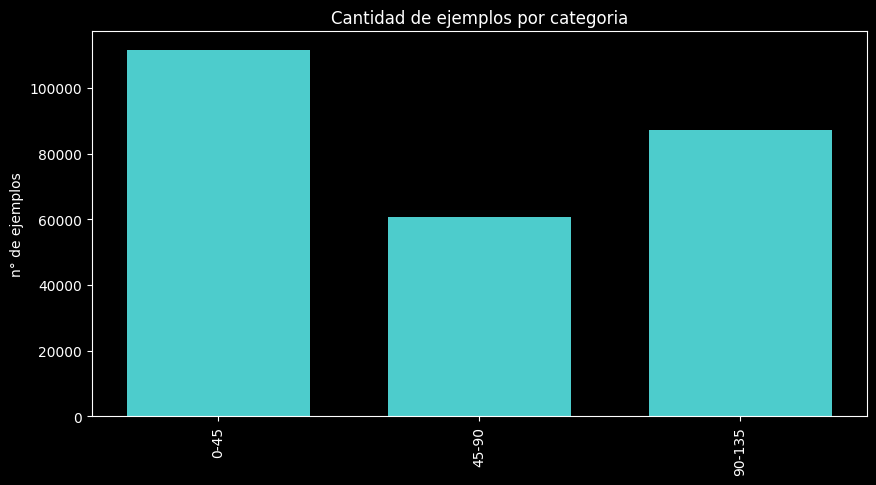

In [ ]:
#Verificación de equilibrio de dataset
count_robi=robi_df.groupby('3 franjas').count()
nombres=['0-45','45-90','90-135']
cantidad=np.array(count_robi[0:3]['DeltMed'])

plt.figure(figsize=(10,5))
plt.title('Cantidad de ejemplos por categoria')
plt.bar(nombres,cantidad, align='center', width=0.7, bottom=0, color=(0.3,0.8,0.8,1))
plt.xticks(rotation='vertical')
plt.ylabel('n° de ejemplos')
mplcyberpunk.make_lines_glow()

plt.show()

In [ ]:
# Se generan 3 datasets distintos 
envolventes=robi_df[['DeltMed','DeltFront','Biceps','Flex_Muñe','Flex_Dedos','Prona']]
crudas=robi_df[['can1raw',	'can2raw',	'can3raw',	'can4raw',	'can5raw',	'can6raw']]
completo=robi_df.drop(['Angulo',	'3 franjas',	'4 franjas'], axis=1)

display(envolventes,crudas,completo)

print('')
print('//////////////////////////')
print('////////////OK////////////')
print('//////////////////////////')

DeltMed   DeltFront       Biceps    Flex_Muñe   Flex_Dedos  \
0       12.290716  549.105425  1092.563919  1634.054660  2173.394291   
1       24.412208  558.046100  1104.902734  1647.886006  2186.587757   
2       36.365329  566.823130  1117.017937  1661.495353  2199.581512   
3       48.150933  575.437618  1128.911021  1674.884014  2212.376672   
4       59.769874  583.890669  1140.583480  1688.053304  2224.974349   
...           ...         ...          ...          ...          ...   
259896  15.475261  544.108699  1104.952133  1622.760387  2164.451207   
259897  12.460044  543.307759  1100.067524  1622.213285  2163.563738   
259898   9.405118  542.496479  1095.130236  1621.663695  2162.674863   
259899   6.310274  541.674799  1090.140039  1621.111619  2161.784603   
259900   3.175305  540.842659  1085.096703  1620.557054  2160.892976   

              Prona  
0       2704.079359  
1       2708.129126  
2       2712.149371  
3       2716.140166  
4       2720.101583  
...             ...  
259896  2699.543156  
259897  2699.627167  
259898  2699.714840  
259899  2699.806191  
259900  2699.901239  

[259901 rows x 6 columns]

can1raw   can2raw  can3raw  can4raw  can5raw  can6raw
0      -3846.00  14671.28  3980.62 -4295.11  -874.40 -1232.27
1      -3442.57  13645.11  4065.02 -4412.86  -767.76 -2332.94
2      -2785.47  12551.20  4354.72 -3703.44 -1183.50 -2328.45
3      -2891.49  13116.50  4407.63 -3244.71 -1473.02 -1209.36
4      -3501.45  14298.05  4189.23 -3597.89 -1289.14  -685.89
...         ...       ...      ...      ...      ...      ...
259896  -990.94  15384.24  2776.91 -4206.64 -2033.49 -2609.28
259897  -624.15  15927.56  2827.09 -2965.67 -2125.47 -2096.84
259898 -1603.00  17360.24  2658.49 -3315.41 -2045.34 -2238.39
259899 -2385.29  17829.45  2500.29 -4462.95 -1801.73 -2722.69
259900 -1975.04  16755.89  2531.51 -5018.86 -1693.19 -2960.00

[259901 rows x 6 columns]

DeltMed   DeltFront       Biceps    Flex_Muñe   Flex_Dedos  \
0       12.290716  549.105425  1092.563919  1634.054660  2173.394291   
1       24.412208  558.046100  1104.902734  1647.886006  2186.587757   
2       36.365329  566.823130  1117.017937  1661.495353  2199.581512   
3       48.150933  575.437618  1128.911021  1674.884014  2212.376672   
4       59.769874  583.890669  1140.583480  1688.053304  2224.974349   
...           ...         ...          ...          ...          ...   
259896  15.475261  544.108699  1104.952133  1622.760387  2164.451207   
259897  12.460044  543.307759  1100.067524  1622.213285  2163.563738   
259898   9.405118  542.496479  1095.130236  1621.663695  2162.674863   
259899   6.310274  541.674799  1090.140039  1621.111619  2161.784603   
259900   3.175305  540.842659  1085.096703  1620.557054  2160.892976   

              Prona  can1raw   can2raw  can3raw  can4raw  can5raw  can6raw  
0       2704.079359 -3846.00  14671.28  3980.62 -4295.11  -874.40 -1232.27  
1       2708.129126 -3442.57  13645.11  4065.02 -4412.86  -767.76 -2332.94  
2       2712.149371 -2785.47  12551.20  4354.72 -3703.44 -1183.50 -2328.45  
3       2716.140166 -2891.49  13116.50  4407.63 -3244.71 -1473.02 -1209.36  
4       2720.101583 -3501.45  14298.05  4189.23 -3597.89 -1289.14  -685.89  
...             ...      ...       ...      ...      ...      ...      ...  
259896  2699.543156  -990.94  15384.24  2776.91 -4206.64 -2033.49 -2609.28  
259897  2699.627167  -624.15  15927.56  2827.09 -2965.67 -2125.47 -2096.84  
259898  2699.714840 -1603.00  17360.24  2658.49 -3315.41 -2045.34 -2238.39  
259899  2699.806191 -2385.29  17829.45  2500.29 -4462.95 -1801.73 -2722.69  
259900  2699.901239 -1975.04  16755.89  2531.51 -5018.86 -1693.19 -2960.00  

[259901 rows x 12 columns]


//////////////////////////
////////////OK////////////
//////////////////////////


In [ ]:
# Aplicamos MinMaxScaler a la data
from sklearn.preprocessing import MinMaxScaler

# Inicializar escalador
scaler = MinMaxScaler()

# Aplicar escalador a los 3 datasets
print(scaler.fit(envolventes))
robi_df_escal_env=pd.DataFrame(scaler.transform(envolventes),
                           columns=envolventes.columns)
print(scaler.fit(crudas))
robi_df_escal_crudo=pd.DataFrame(scaler.transform(crudas),
                           columns=crudas.columns)
print(scaler.fit(completo))
robi_df_escal_completo=pd.DataFrame(scaler.transform(completo),
                           columns=completo.columns)

# Muestra de resultados
display(robi_df_escal_env,robi_df_escal_crudo,robi_df_escal_completo)

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


DeltMed  DeltFront    Biceps  Flex_Muñe  Flex_Dedos     Prona
0       0.247748   0.208665  0.178718   0.164989    0.168876  0.171864
1       0.265351   0.232010  0.203682   0.187489    0.190010  0.182273
2       0.282709   0.254928  0.228194   0.209627    0.210825  0.192606
3       0.299825   0.277422  0.252256   0.231407    0.231322  0.202863
4       0.316698   0.299493  0.275873   0.252830    0.251502  0.213044
...          ...        ...       ...        ...         ...       ...
259896  0.252372   0.195618  0.203782   0.146616    0.154550  0.160205
259897  0.247994   0.193527  0.193899   0.145726    0.153128  0.160421
259898  0.243557   0.191409  0.183910   0.144832    0.151704  0.160646
259899  0.239063   0.189263  0.173814   0.143934    0.150278  0.160881
259900  0.234510   0.187090  0.163610   0.143032    0.148850  0.161125

[259901 rows x 6 columns]

can1raw   can2raw   can3raw   can4raw   can5raw   can6raw
0       0.259546  0.562185  0.635017  0.333882  0.749379  0.496714
1       0.296044  0.559331  0.642612  0.322341  0.782175  0.493779
2       0.355491  0.556289  0.668678  0.391876  0.654318  0.493791
3       0.345900  0.557861  0.673439  0.436839  0.565279  0.496775
4       0.290717  0.561147  0.653788  0.402221  0.621829  0.498171
...          ...       ...       ...       ...       ...       ...
259896  0.517842  0.564167  0.526709  0.342554  0.392911  0.493042
259897  0.551025  0.565678  0.531224  0.464190  0.364624  0.494408
259898  0.462469  0.569662  0.516054  0.429909  0.389267  0.494031
259899  0.391696  0.570967  0.501819  0.317431  0.464187  0.492740
259900  0.428811  0.567981  0.504628  0.262943  0.497567  0.492107

[259901 rows x 6 columns]

DeltMed  DeltFront    Biceps  Flex_Muñe  Flex_Dedos     Prona  \
0       0.247748   0.208665  0.178718   0.164989    0.168876  0.171864   
1       0.265351   0.232010  0.203682   0.187489    0.190010  0.182273   
2       0.282709   0.254928  0.228194   0.209627    0.210825  0.192606   
3       0.299825   0.277422  0.252256   0.231407    0.231322  0.202863   
4       0.316698   0.299493  0.275873   0.252830    0.251502  0.213044   
...          ...        ...       ...        ...         ...       ...   
259896  0.252372   0.195618  0.203782   0.146616    0.154550  0.160205   
259897  0.247994   0.193527  0.193899   0.145726    0.153128  0.160421   
259898  0.243557   0.191409  0.183910   0.144832    0.151704  0.160646   
259899  0.239063   0.189263  0.173814   0.143934    0.150278  0.160881   
259900  0.234510   0.187090  0.163610   0.143032    0.148850  0.161125   

         can1raw   can2raw   can3raw   can4raw   can5raw   can6raw  
0       0.259546  0.562185  0.635017  0.333882  0.749379  0.496714  
1       0.296044  0.559331  0.642612  0.322341  0.782175  0.493779  
2       0.355491  0.556289  0.668678  0.391876  0.654318  0.493791  
3       0.345900  0.557861  0.673439  0.436839  0.565279  0.496775  
4       0.290717  0.561147  0.653788  0.402221  0.621829  0.498171  
...          ...       ...       ...       ...       ...       ...  
259896  0.517842  0.564167  0.526709  0.342554  0.392911  0.493042  
259897  0.551025  0.565678  0.531224  0.464190  0.364624  0.494408  
259898  0.462469  0.569662  0.516054  0.429909  0.389267  0.494031  
259899  0.391696  0.570967  0.501819  0.317431  0.464187  0.492740  
259900  0.428811  0.567981  0.504628  0.262943  0.497567  0.492107  

[259901 rows x 12 columns]

Visualización

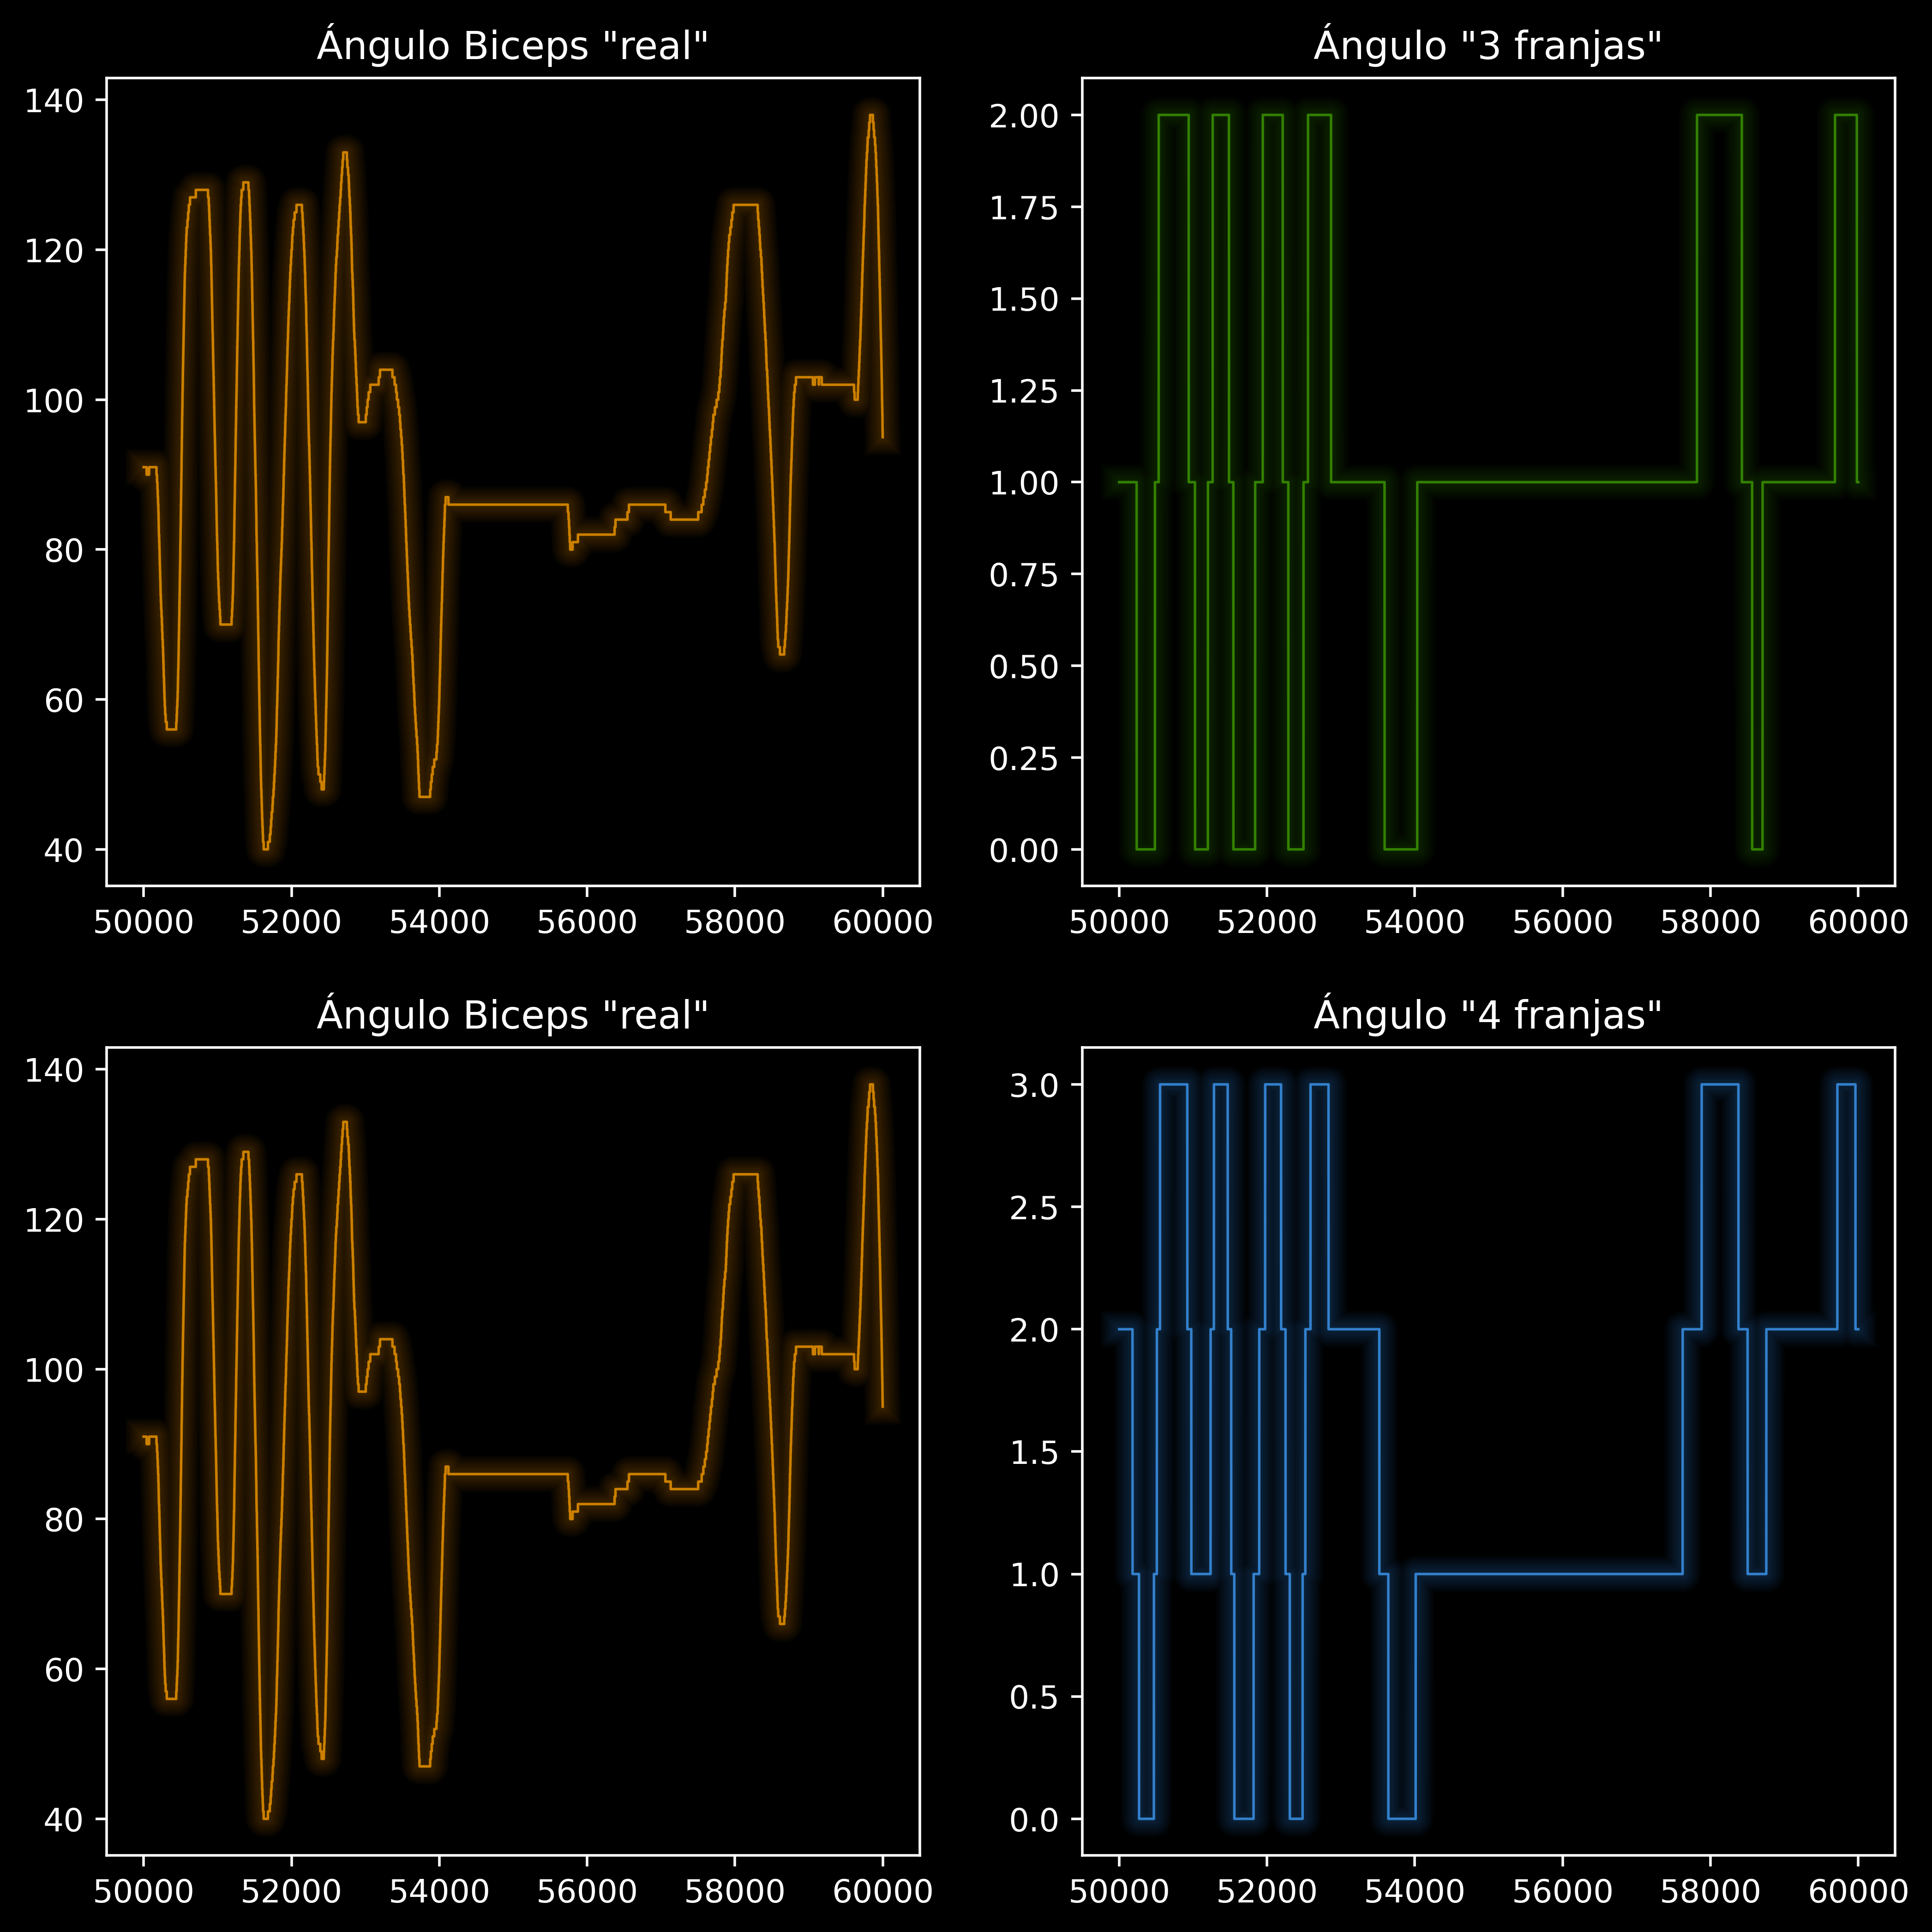

In [ ]:
# Visualización de categorización
# En este caso se muestran los casos de 3 y 4 franjas

plt.rcParams["figure.dpi"] = 500

plt.figure(figsize=(10,10))
limi_i=50000
limi_s=60000
plt.subplot(221)
plt.title('Ángulo Biceps "real"')
plt.plot(robi_df['Angulo'][limi_i:limi_s],linewidth=0.8, color=(0.8,0.5,0,1))
mplcyberpunk.make_lines_glow()

plt.subplot(222)
plt.title('Ángulo "3 franjas"')
plt.plot(robi_df['3 franjas'][limi_i:limi_s],linewidth=0.8, color=(0.2,0.5,0,1))
mplcyberpunk.make_lines_glow()

plt.subplot(223)
plt.title('Ángulo Biceps "real"')
plt.plot(robi_df['Angulo'][limi_i:limi_s],linewidth=0.8, color=(0.8,0.5,0,1))
mplcyberpunk.make_lines_glow()

plt.subplot(224)
plt.title('Ángulo "4 franjas"')
plt.plot(robi_df['4 franjas'][limi_i:limi_s],linewidth=0.8, color=(0.2,0.5,0.8,1))
mplcyberpunk.make_lines_glow()

plt.show()

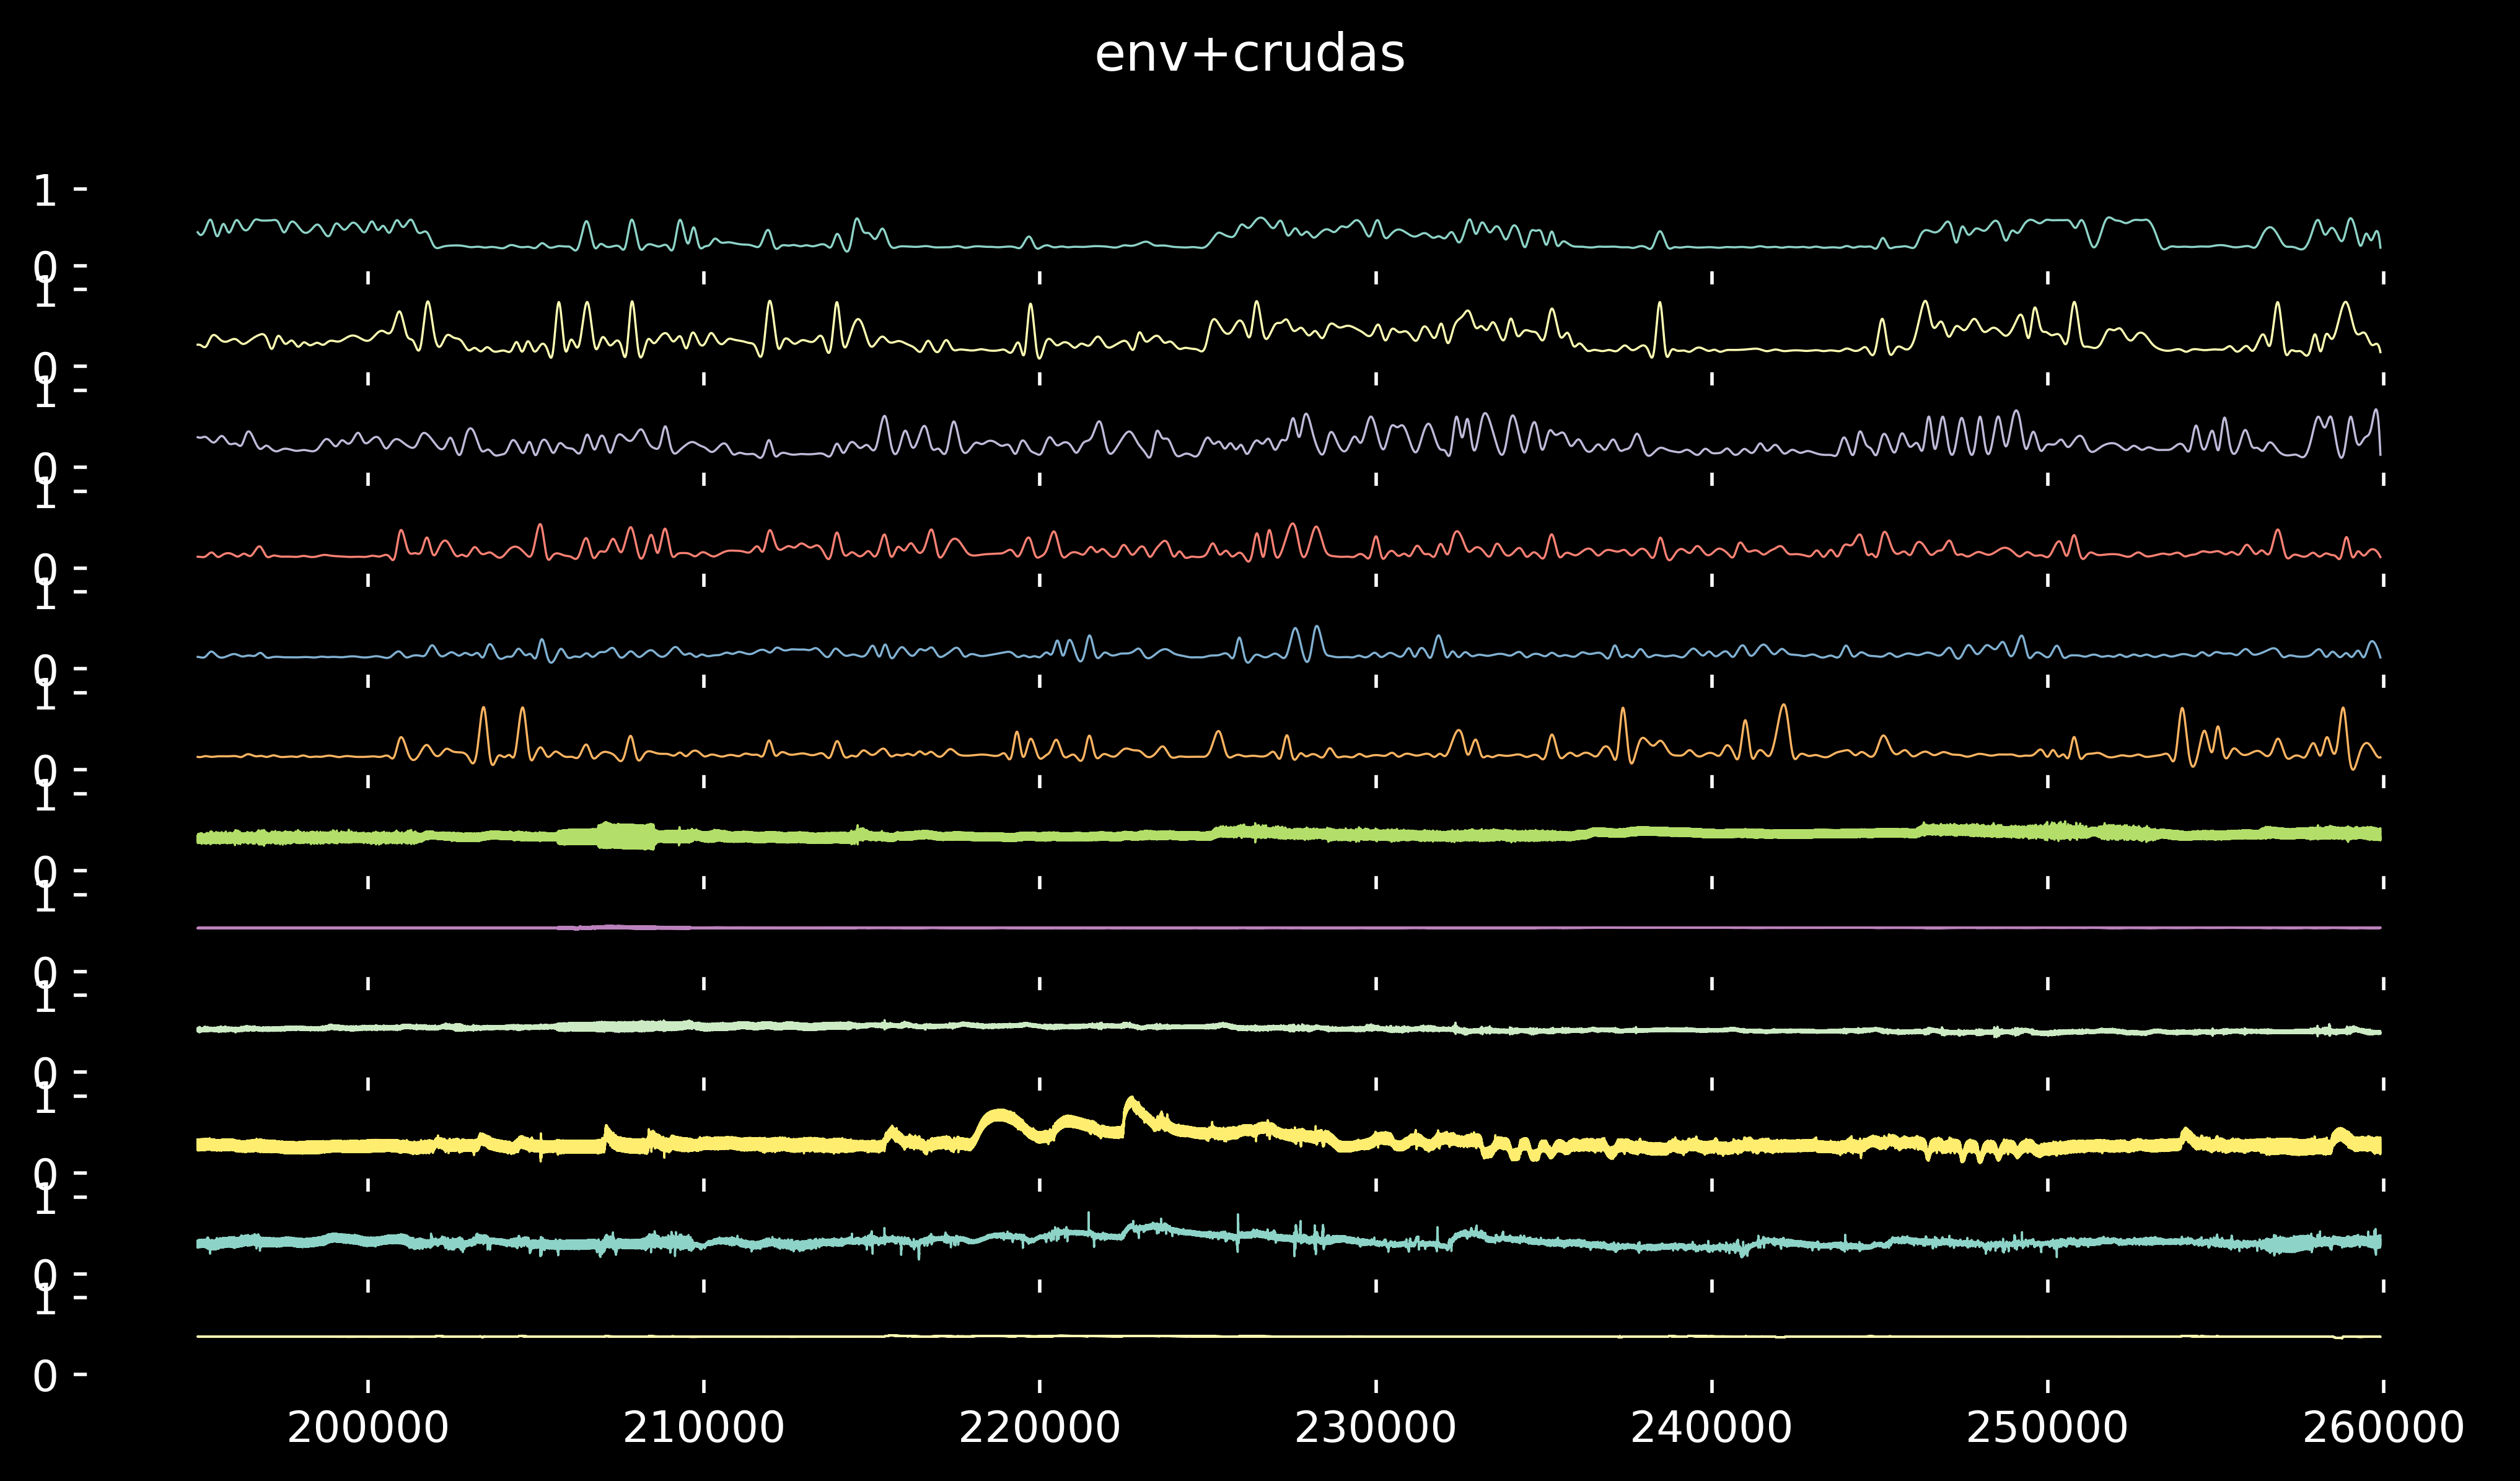

In [ ]:
# Visualización de 60000 muestras de dataset completo
# Se pueden observar las señales crudas, y sus respectivas envolventes
# Las envolventes son resultado de la extracción de caracteristicas de las señales crudas


index = np.arange(0,len(robi_df_escal_completo),1) #index=el rango que queremos visualizar
plt.rcParams["figure.dpi"] = 500 #calidad de imagen
plt.close('all')
plt.rcParams["axes.edgecolor"] = 'black' 
plt.rcParams["legend.loc"] = 'right' 

robi_df_escal_completo[194925:].plot(figsize=(10,5),
                                     linewidth=0.5,
                                     title='env+crudas',
                                     sharex=True, 
                                     sharey=True,
                                     legend=False,
                                     subplots=True)

# plt.savefig('Señales_CyE.png') # descomentar para guardar

plt.show()

In [ ]:
plt.style.use('default')
robi_df_escal_completo_and=robi_df_escal_completo
robi_df_escal_completo_and['3 franjas']=robi_df['3 franjas']
# display(robi_df_escal_completo_and)

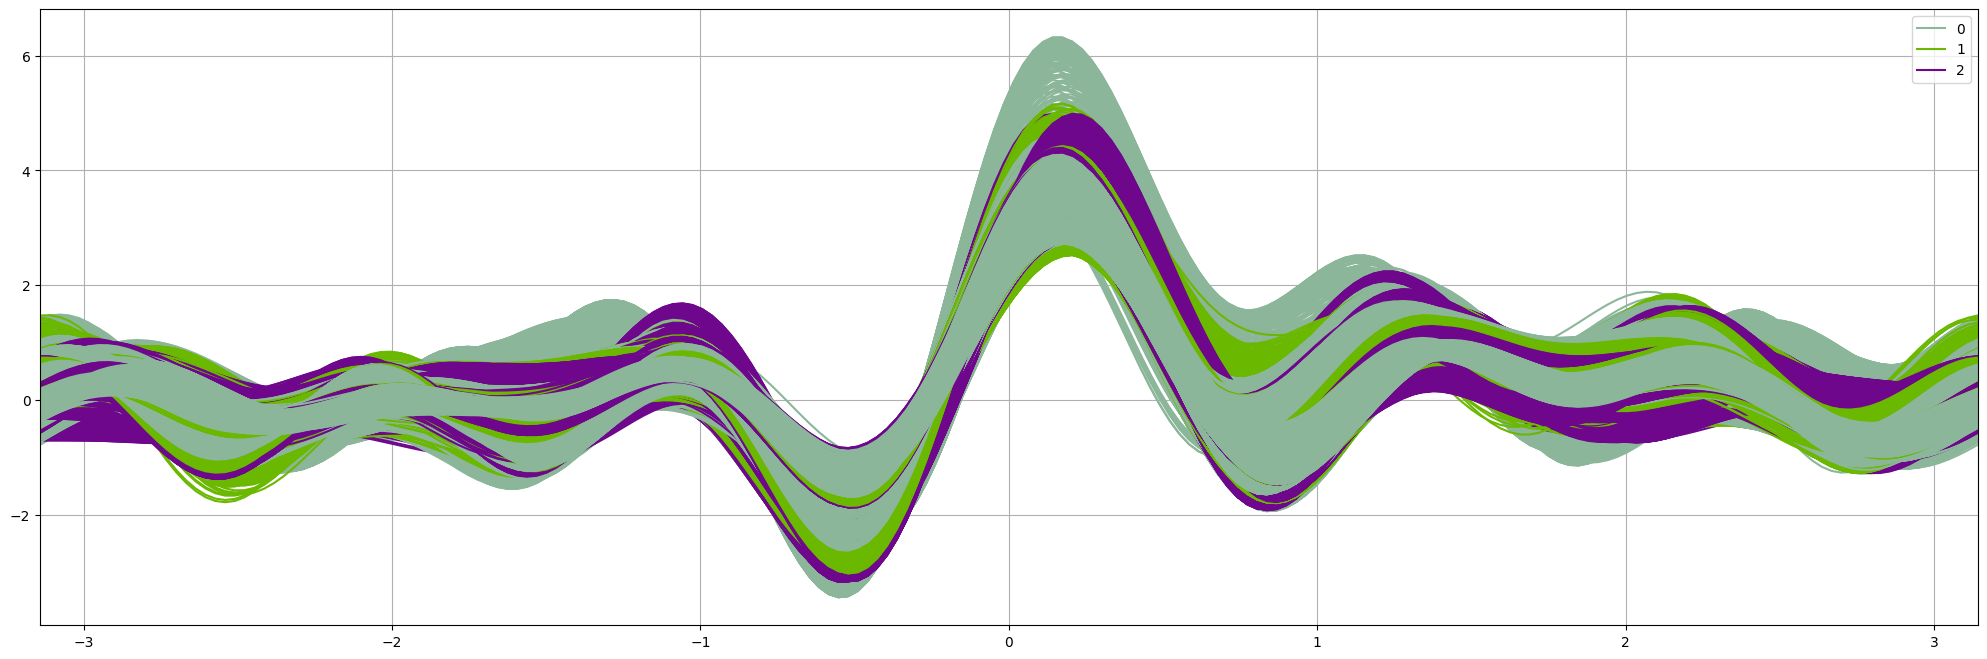

In [ ]:
# Generar un andrews plot 
fig = plt.figure(figsize = (25, 8))
pd.plotting.andrews_curves(robi_df_escal_completo_and,'3 franjas')
plt.show()

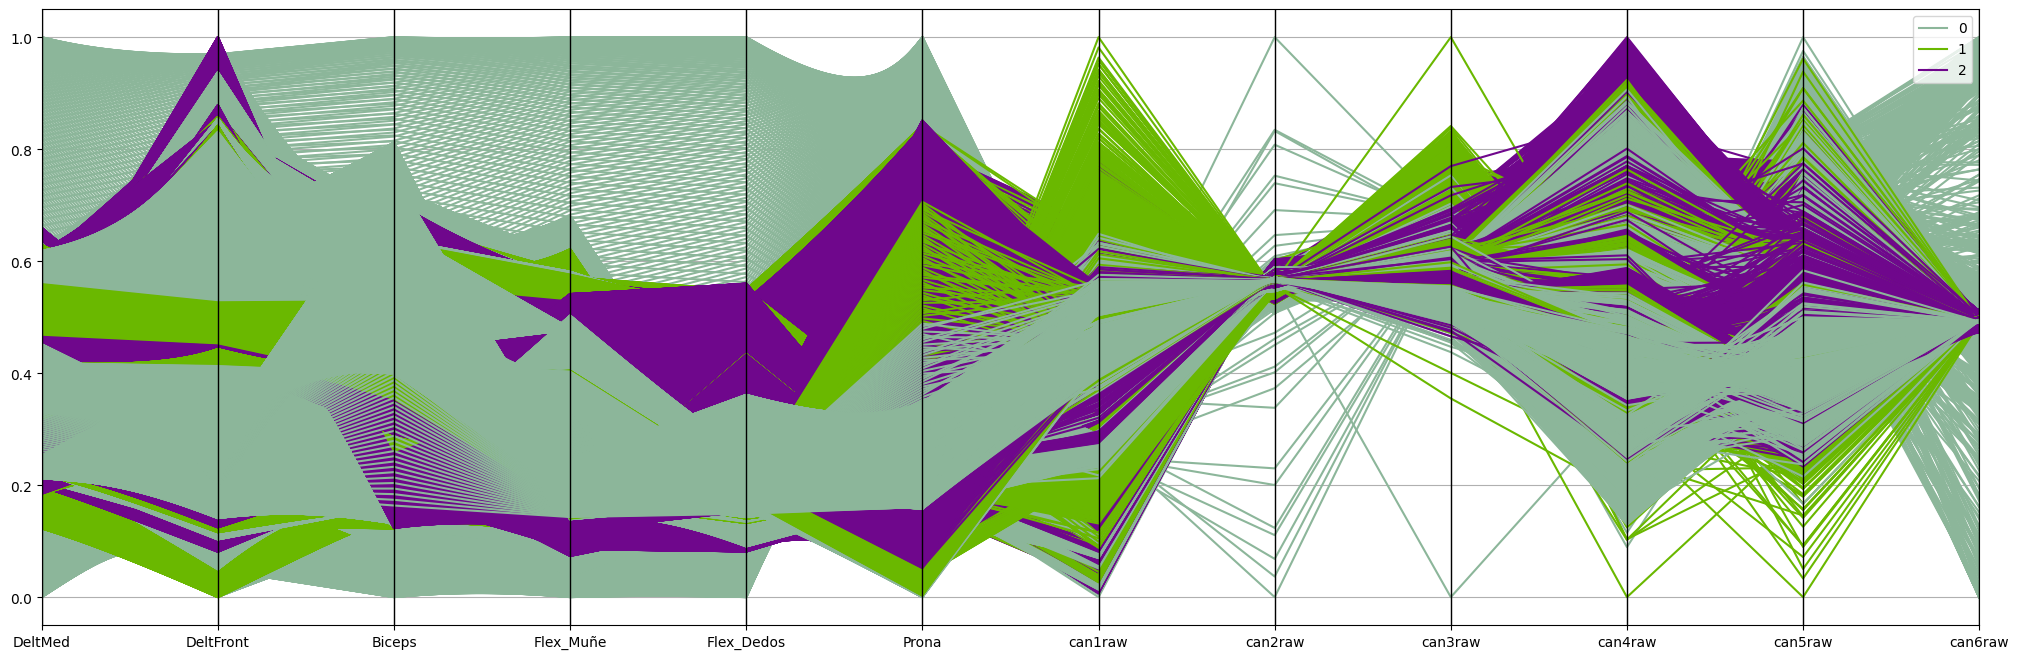

In [ ]:
#Generar un grafico de coordenadas paralelas.
fig = plt.figure(figsize = (25, 8))
pd.plotting.parallel_coordinates(robi_df_escal_completo_and,'3 franjas')
plt.show()

# 2 ROBI CNN

## 2.1 Prueba directa con imagen de señales ventaneadas


### 2.1.1 Generación de dataset

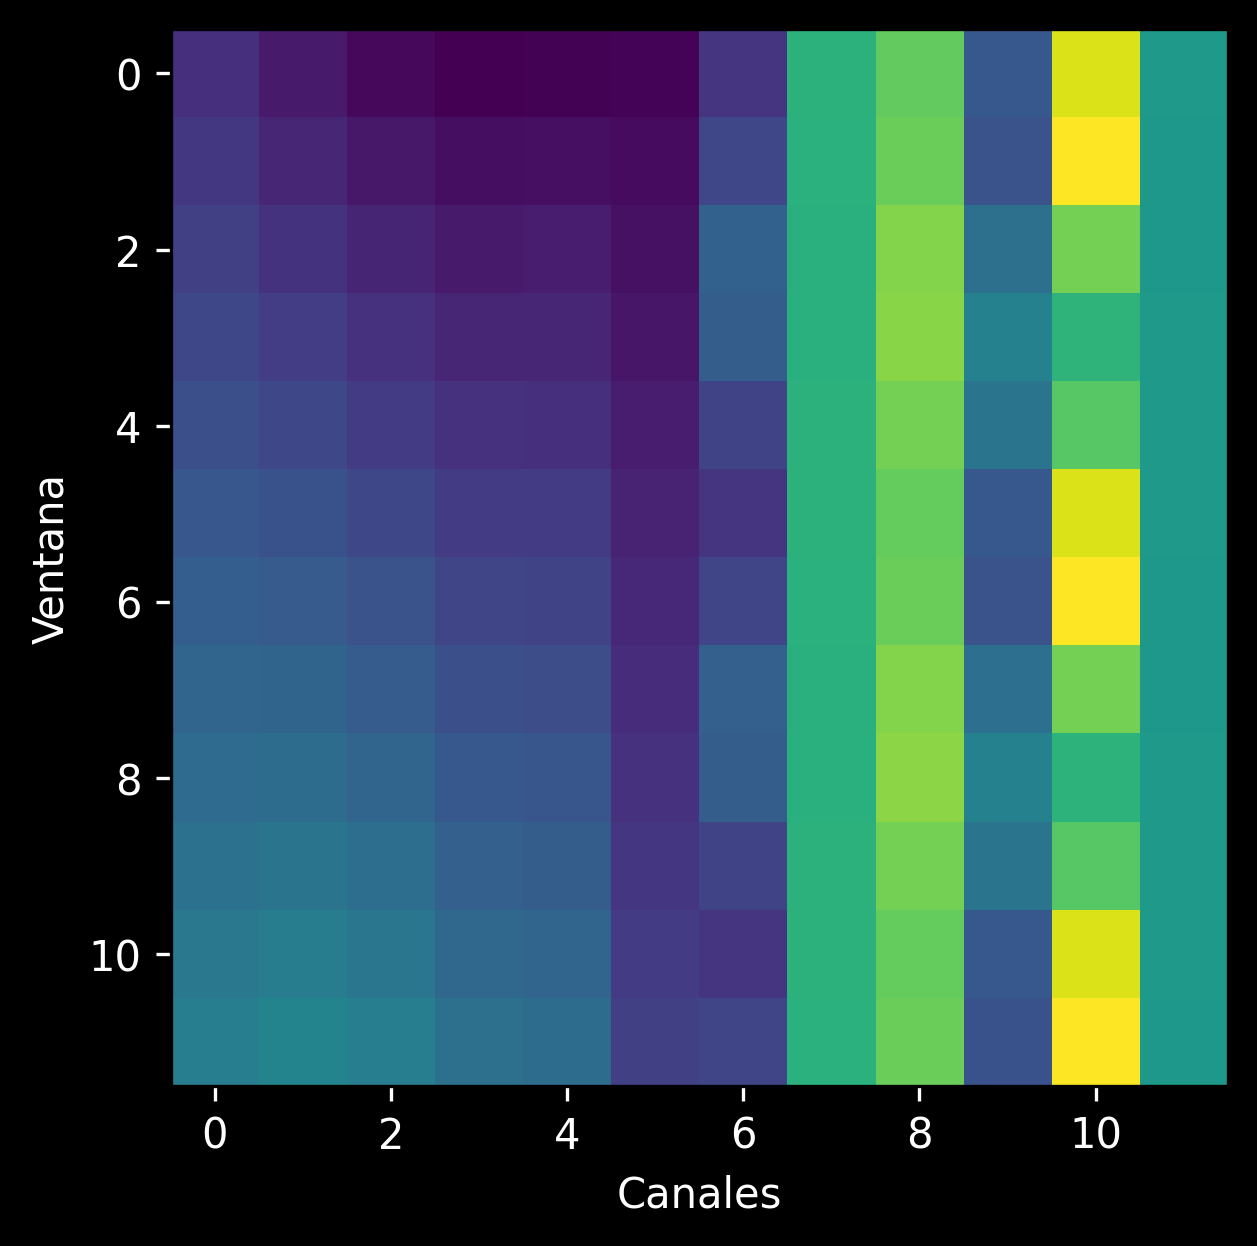

In [ ]:
data=robi_df_escal_completo
target=robi_df['3 franjas']

# visualizar como imagen:
plt.figure(figsize=(10,10))
plt.subplot(121)
# plt.title('')
plt.xlabel('Canales')
plt.ylabel('Ventana')
plt.imshow(data[0:12])
plt.show()

In [ ]:
n = 12 # ventana!!! 
# Split data
df_data=data
imagenes = [df_data[i:i+n] for i in range(0,df_data.shape[0],n)]

# Split targets
df_target=target
targets = [df_target[i:i+n] for i in range(0,df_target.shape[0],n)]


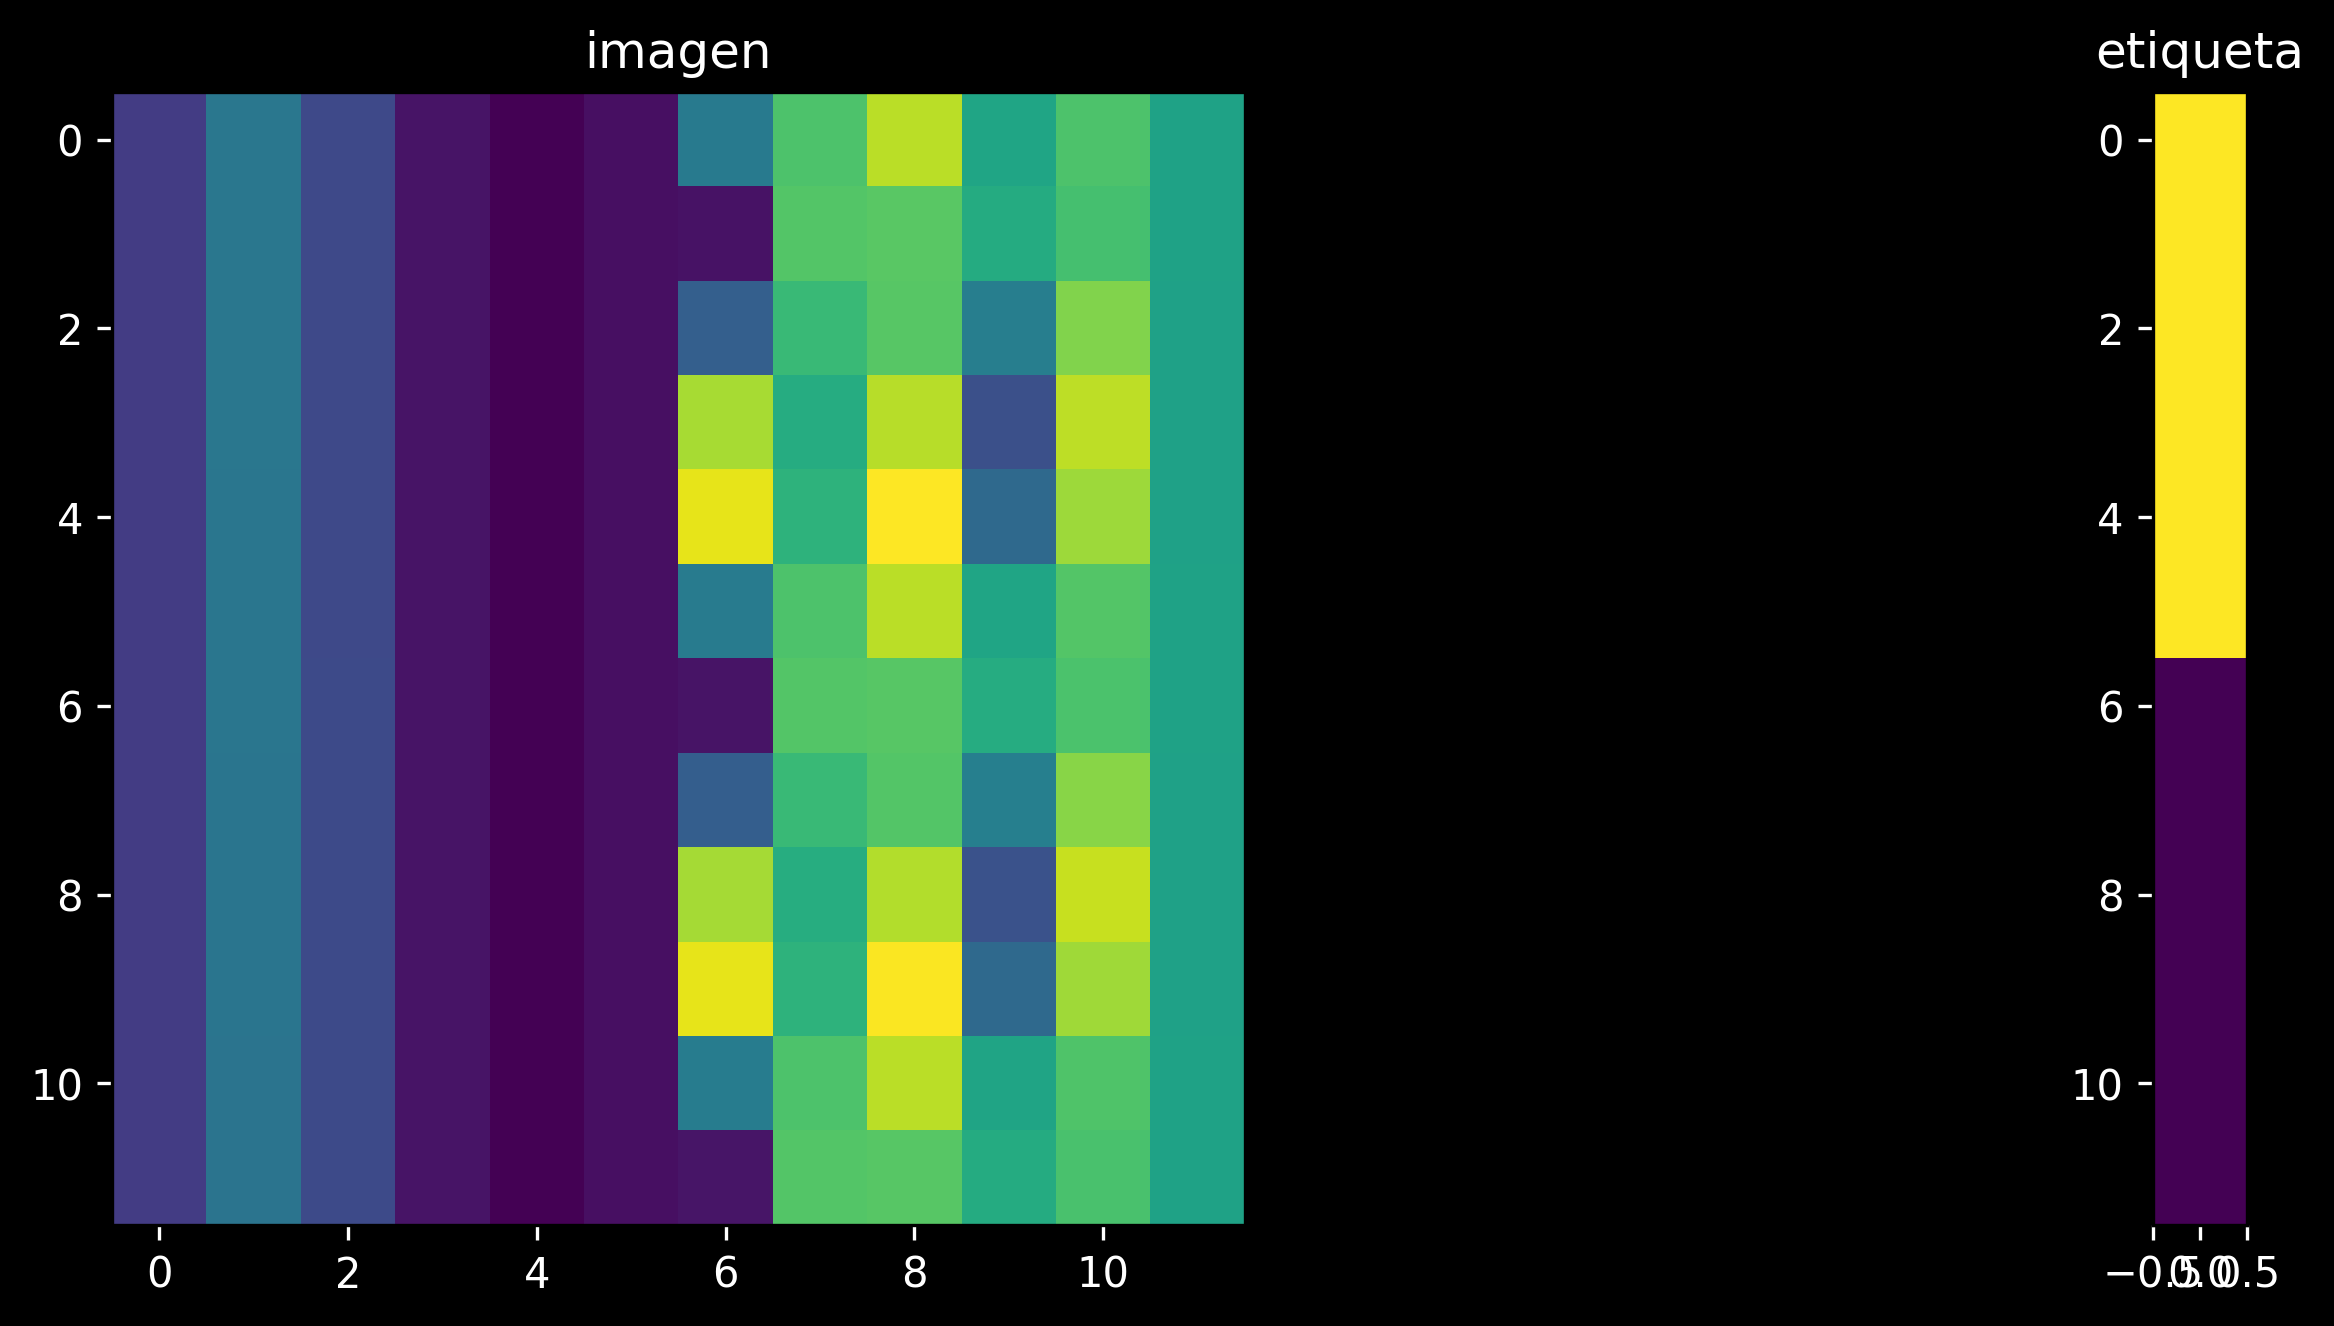

24276    1
24277    1
24278    1
24279    1
24280    1
24281    1
24282    0
24283    0
24284    0
24285    0
24286    0
24287    0
Name: 3 franjas, dtype: int64

In [ ]:
# Extraemos moda de la columna target para generar etiqueta ordenada
# Si existen 2 modas, elegir la numericamente mas pequeña.
id=2023
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('imagen')
plt.imshow(imagenes[id])
plt.subplot(122)
plt.title('etiqueta')
plt.imshow(np.array(targets[id]/.2).reshape(len(targets[id]),1))
plt.show()

display(targets[id])

In [ ]:
# min(targets[id].mode())
# prueba=pd.DataFrame([0,0,0,0,0,1,1,1,1,1])
# min(np.array(prueba.mode()))

targets_uni=[]
for f in targets:
  targets_uni.append(min(np.array(f.mode())))
  

In [ ]:
# prueba_estadistica=pd.DataFrame(targets_uni)
imagenes=imagenes[:21657]
targets_uni=targets_uni[:21657]

In [ ]:
# x_train=imagenes[:int(len(imagenes)*0.8)]
# x_test=imagenes[int(len(imagenes)*0.8):]
# y_train=targets_uni[:int(len(targets_uni)*0.8)]
# y_test=targets_uni[int(len(targets_uni)*0.8):]
x_train, x_test ,y_train, y_test = train_test_split( imagenes , targets_uni , random_state=0)

print(len(x_train),len(x_test))
print(len(y_train),len(y_test))


16242 5415
16242 5415


In [ ]:
# x_train[1].reshape(12,12,1)

x_train=np.array(x_train)
x_train_cnn=x_train.reshape(16242 ,12,12,1)
x_test=np.array(x_test)
x_test_cnn=x_test.reshape(5415,12,12,1)
y_train_cnn=np.array(y_train)
# y_train=y_train.reshape(17325,1)
y_test_cnn=np.array(y_test)
# y_test=y_test.reshape(4332,1)
print(x_train_cnn.shape,x_test_cnn.shape,y_train_cnn.shape)



(16242, 12, 12, 1) (5415, 12, 12, 1) (16242,)


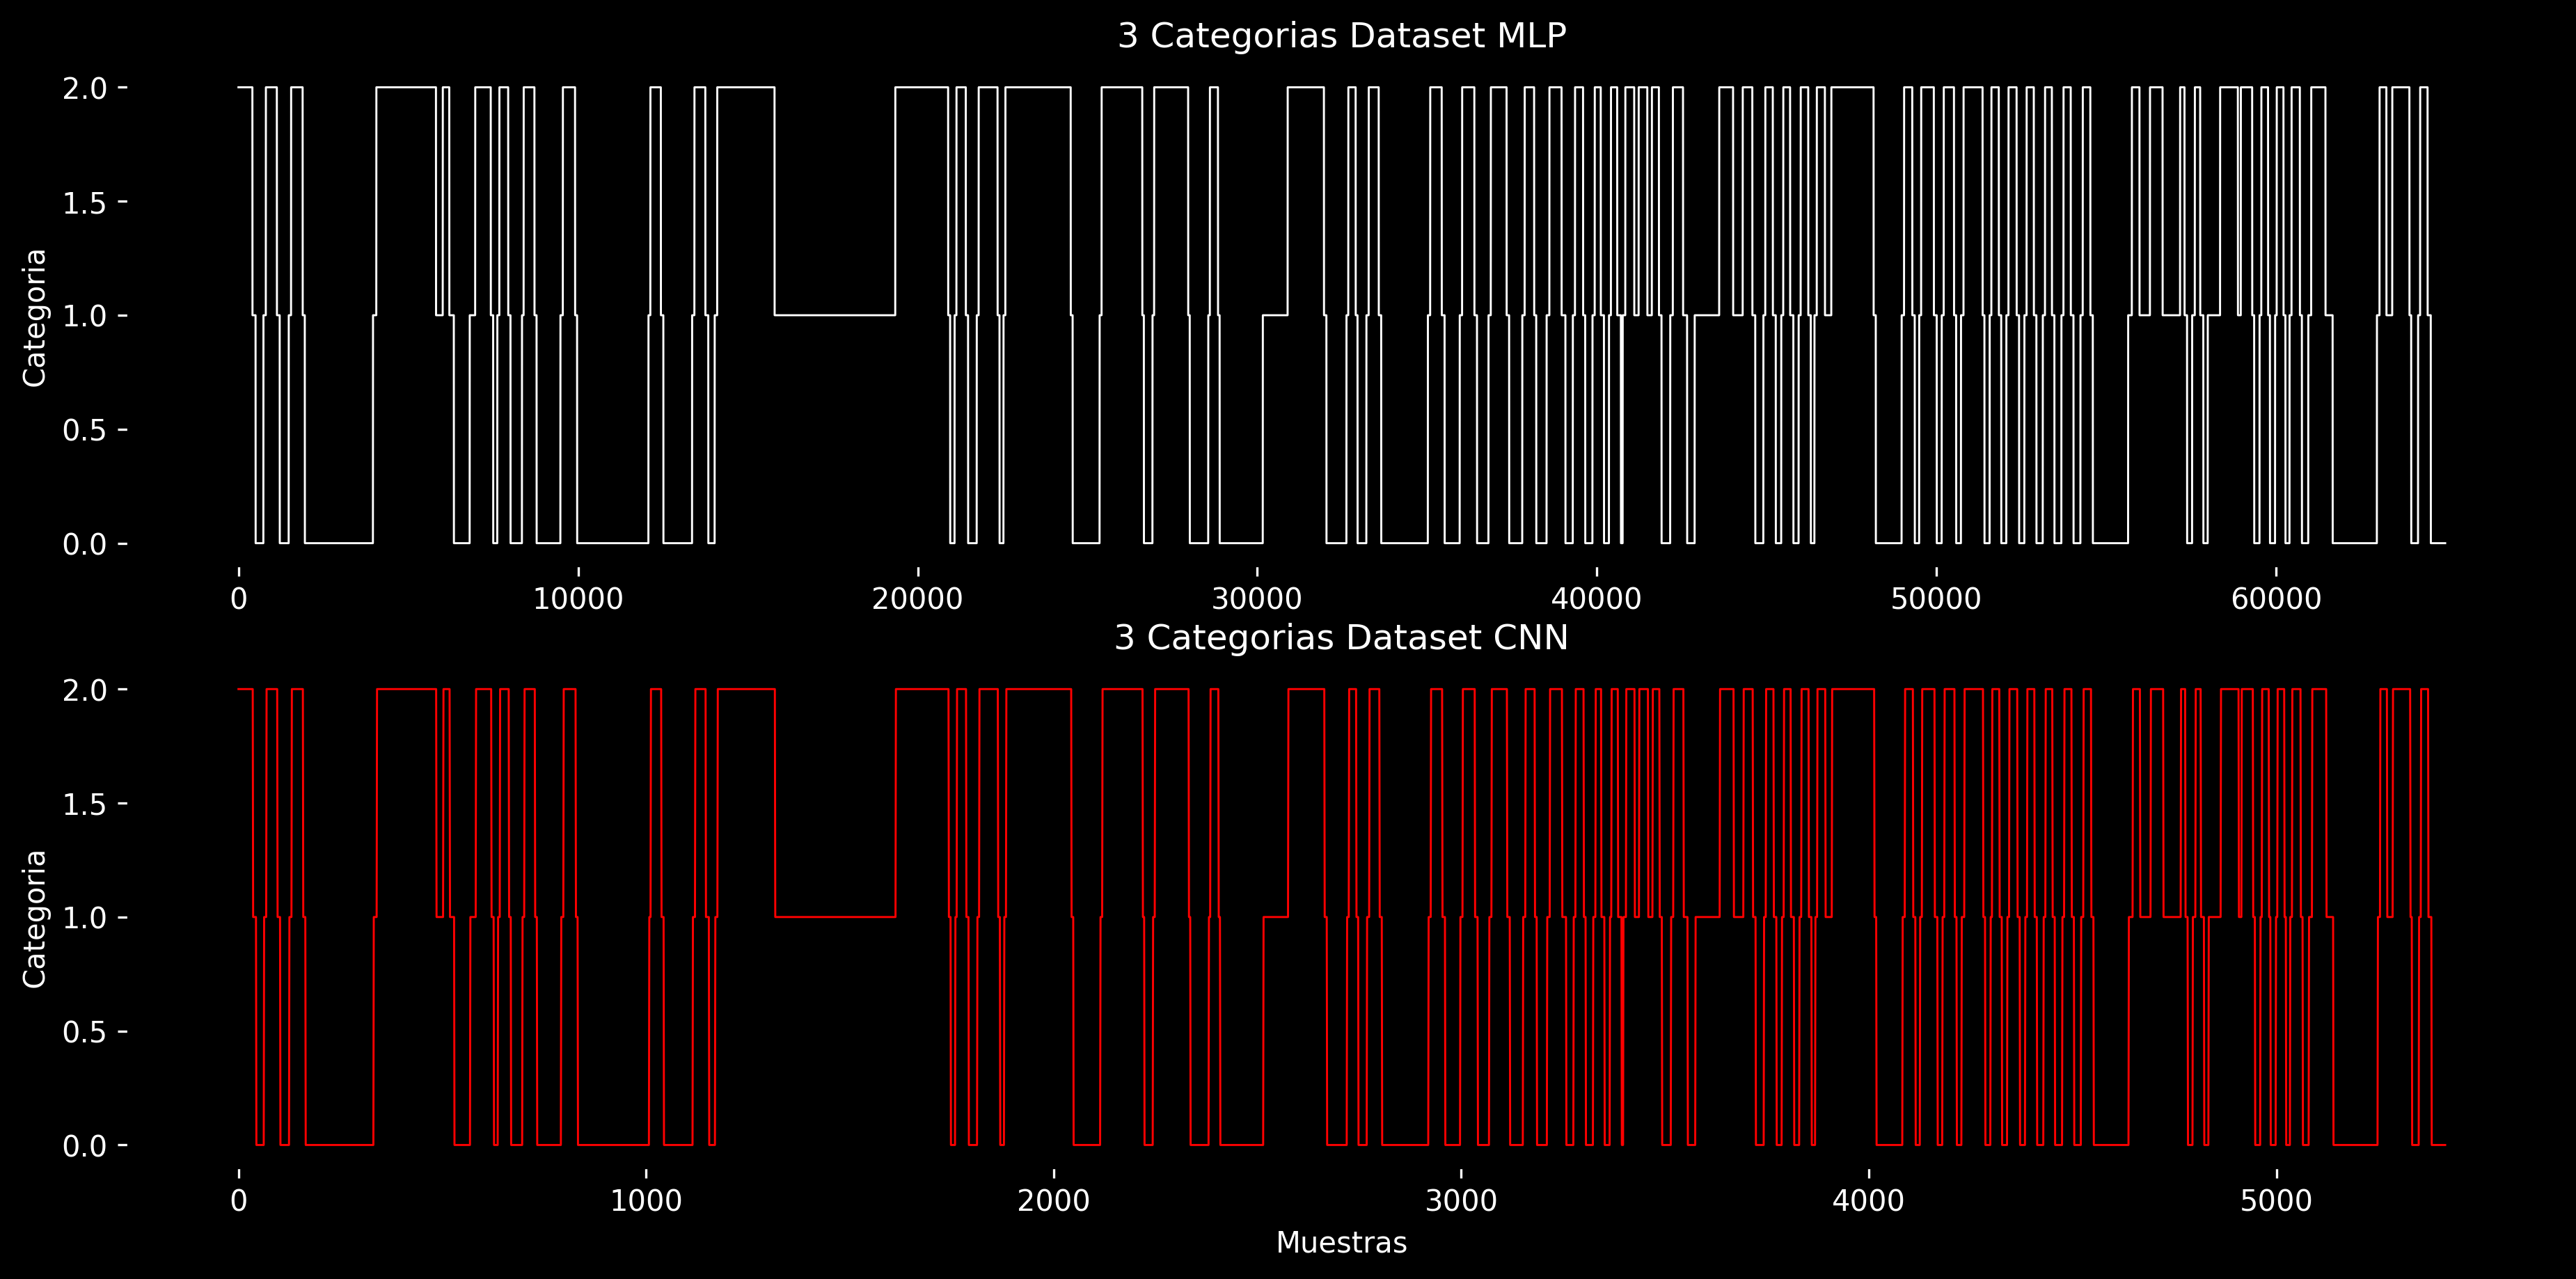

In [ ]:
x_traina, x_testa ,y_traina, y_testa = train_test_split( imagenes , targets_uni , random_state=None, shuffle=False)

plt.figure(figsize=(15,7))

plt.subplot(211)
# plt.xlabel('Muestras')
plt.ylabel('Categoria')
plt.title('3 Categorias Dataset MLP')
plt.plot(np.arange(0,len(y_test1),1),y_test1,color='w',linewidth=0.7)

plt.subplot(212)
plt.xlabel('Muestras')
plt.ylabel('Categoria')
plt.title('3 Categorias Dataset CNN')
plt.plot(np.arange(0,len(y_testa),1),y_testa,color='r',linewidth=0.7)

### 2.1.2 Generamos el modelo y entrenamos la red con la base de datos realizada 

In [ ]:
import numpy as np
import tensorflow as tf 
from tensorflow.keras.layers import Dense, BatchNormalization

In [ ]:
modelCNN = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(12, 12, 1),padding='same'),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    # # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',padding='same'),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), #(actuvaaaaaaaaaaaaaaaaaaaaaar)
    # # BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    # BatchNormalization(),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
modelCNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        320       
                                                                 
 batch_normalization_2 (Batc  (None, 12, 12, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 32)          9248      
                                                                 
 batch_normalization_3 (Batc  (None, 6, 6, 32)         128       
 hNormalization)                                                 
                                                      

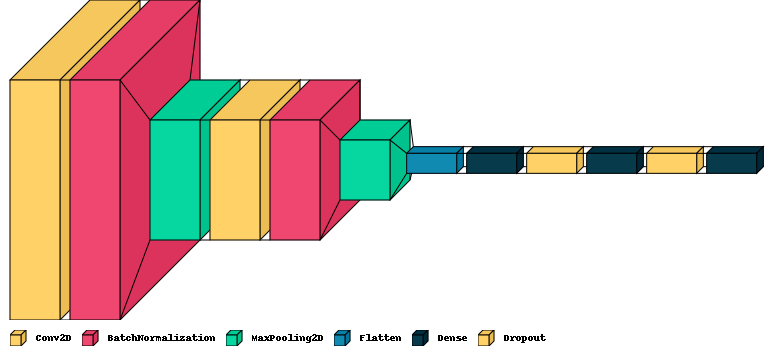

In [ ]:
# !pip install visualkeras

import visualkeras

# visualkeras.layered_view(modelCNN, legend=True) # without custom font
from PIL import ImageFont
font = ImageFont.load_default()
visualkeras.layered_view(modelCNN, legend=True,to_file='output.png', scale_xy=20, scale_z=20, max_z=50, font=font) # selected font

In [ ]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

In [ ]:
# modelCNN.summary()

import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") # para tensorboard
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1) # para tensorboard 

modelCNN.compile(loss = 'SparseCategoricalCrossentropy', optimizer='Adam', metrics=['accuracy'])

history=modelCNN.fit(x_train_cnn,y_train_cnn, epochs=100, callbacks=[tensorboard_callback],validation_data=(x_test_cnn,y_test_cnn))

# modelCNN.save("/content/drive/Shareddrives/ML-IALAB/peru/risk-classificaction/riesguito2.h5")
# rmsprop no sirvio horrible, overifitt y muchisimo ruido en el validation ! 

Epoch 1/100
508/508 [==============================] - 11s 20ms/step - loss: 0.9691 - accuracy: 0.5477 - val_loss: 0.9527 - val_accuracy: 0.5228
Epoch 2/100
508/508 [==============================] - 12s 24ms/step - loss: 0.8433 - accuracy: 0.6163 - val_loss: 0.9233 - val_accuracy: 0.5418
Epoch 3/100
508/508 [==============================] - 8s 15ms/step - loss: 0.8009 - accuracy: 0.6398 - val_loss: 0.8000 - val_accuracy: 0.6571
Epoch 4/100
508/508 [==============================] - 8s 15ms/step - loss: 0.7558 - accuracy: 0.6647 - val_loss: 0.7705 - val_accuracy: 0.6742
Epoch 5/100
508/508 [==============================] - 8s 15ms/step - loss: 0.7229 - accuracy: 0.6851 - val_loss: 0.7372 - val_accuracy: 0.6759
Epoch 6/100
508/508 [==============================] - 8s 15ms/step - loss: 0.6932 - accuracy: 0.7019 - val_loss: 0.6712 - val_accuracy: 0.7151
Epoch 7/100
508/508 [==============================] - 8s 16ms/step - loss: 0.6747 - accuracy: 0.7132 - val_loss: 0.6506 - val_accurac

In [ ]:
tf.test.gpu_device_name()
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

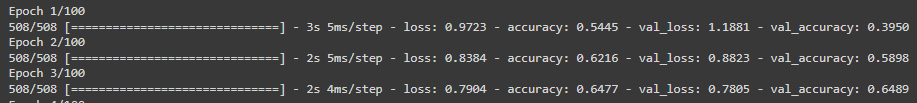

Con cPU:

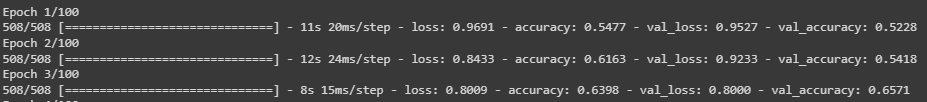

In [ ]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
# %%time
import time

start_time = time.process_time ()

with tf.device('/device:GPU:0'):
  modelCNN.predict(x_test_cnn[5:6])

print(time.process_time () - start_time, "seconds con GPU")

start_time = time.process_time ()

with tf.device('/device:CPU:0'):
  modelCNN.predict(x_test_cnn[5:6])

print(time.process_time () - start_time, "seconds con CPU")


0.04994243999999526 seconds con GPU
0.051508212999806346 seconds con CPU


In [ ]:
# modelCNN.save("/content/drive/MyDrive/5. Robi/Algoritmos Robi/peso_CNN.h5")
modelCNN = tf.keras.models.load_model("/content/drive/MyDrive/5. Robi/Algoritmos Robi/peso_CNN.h5")


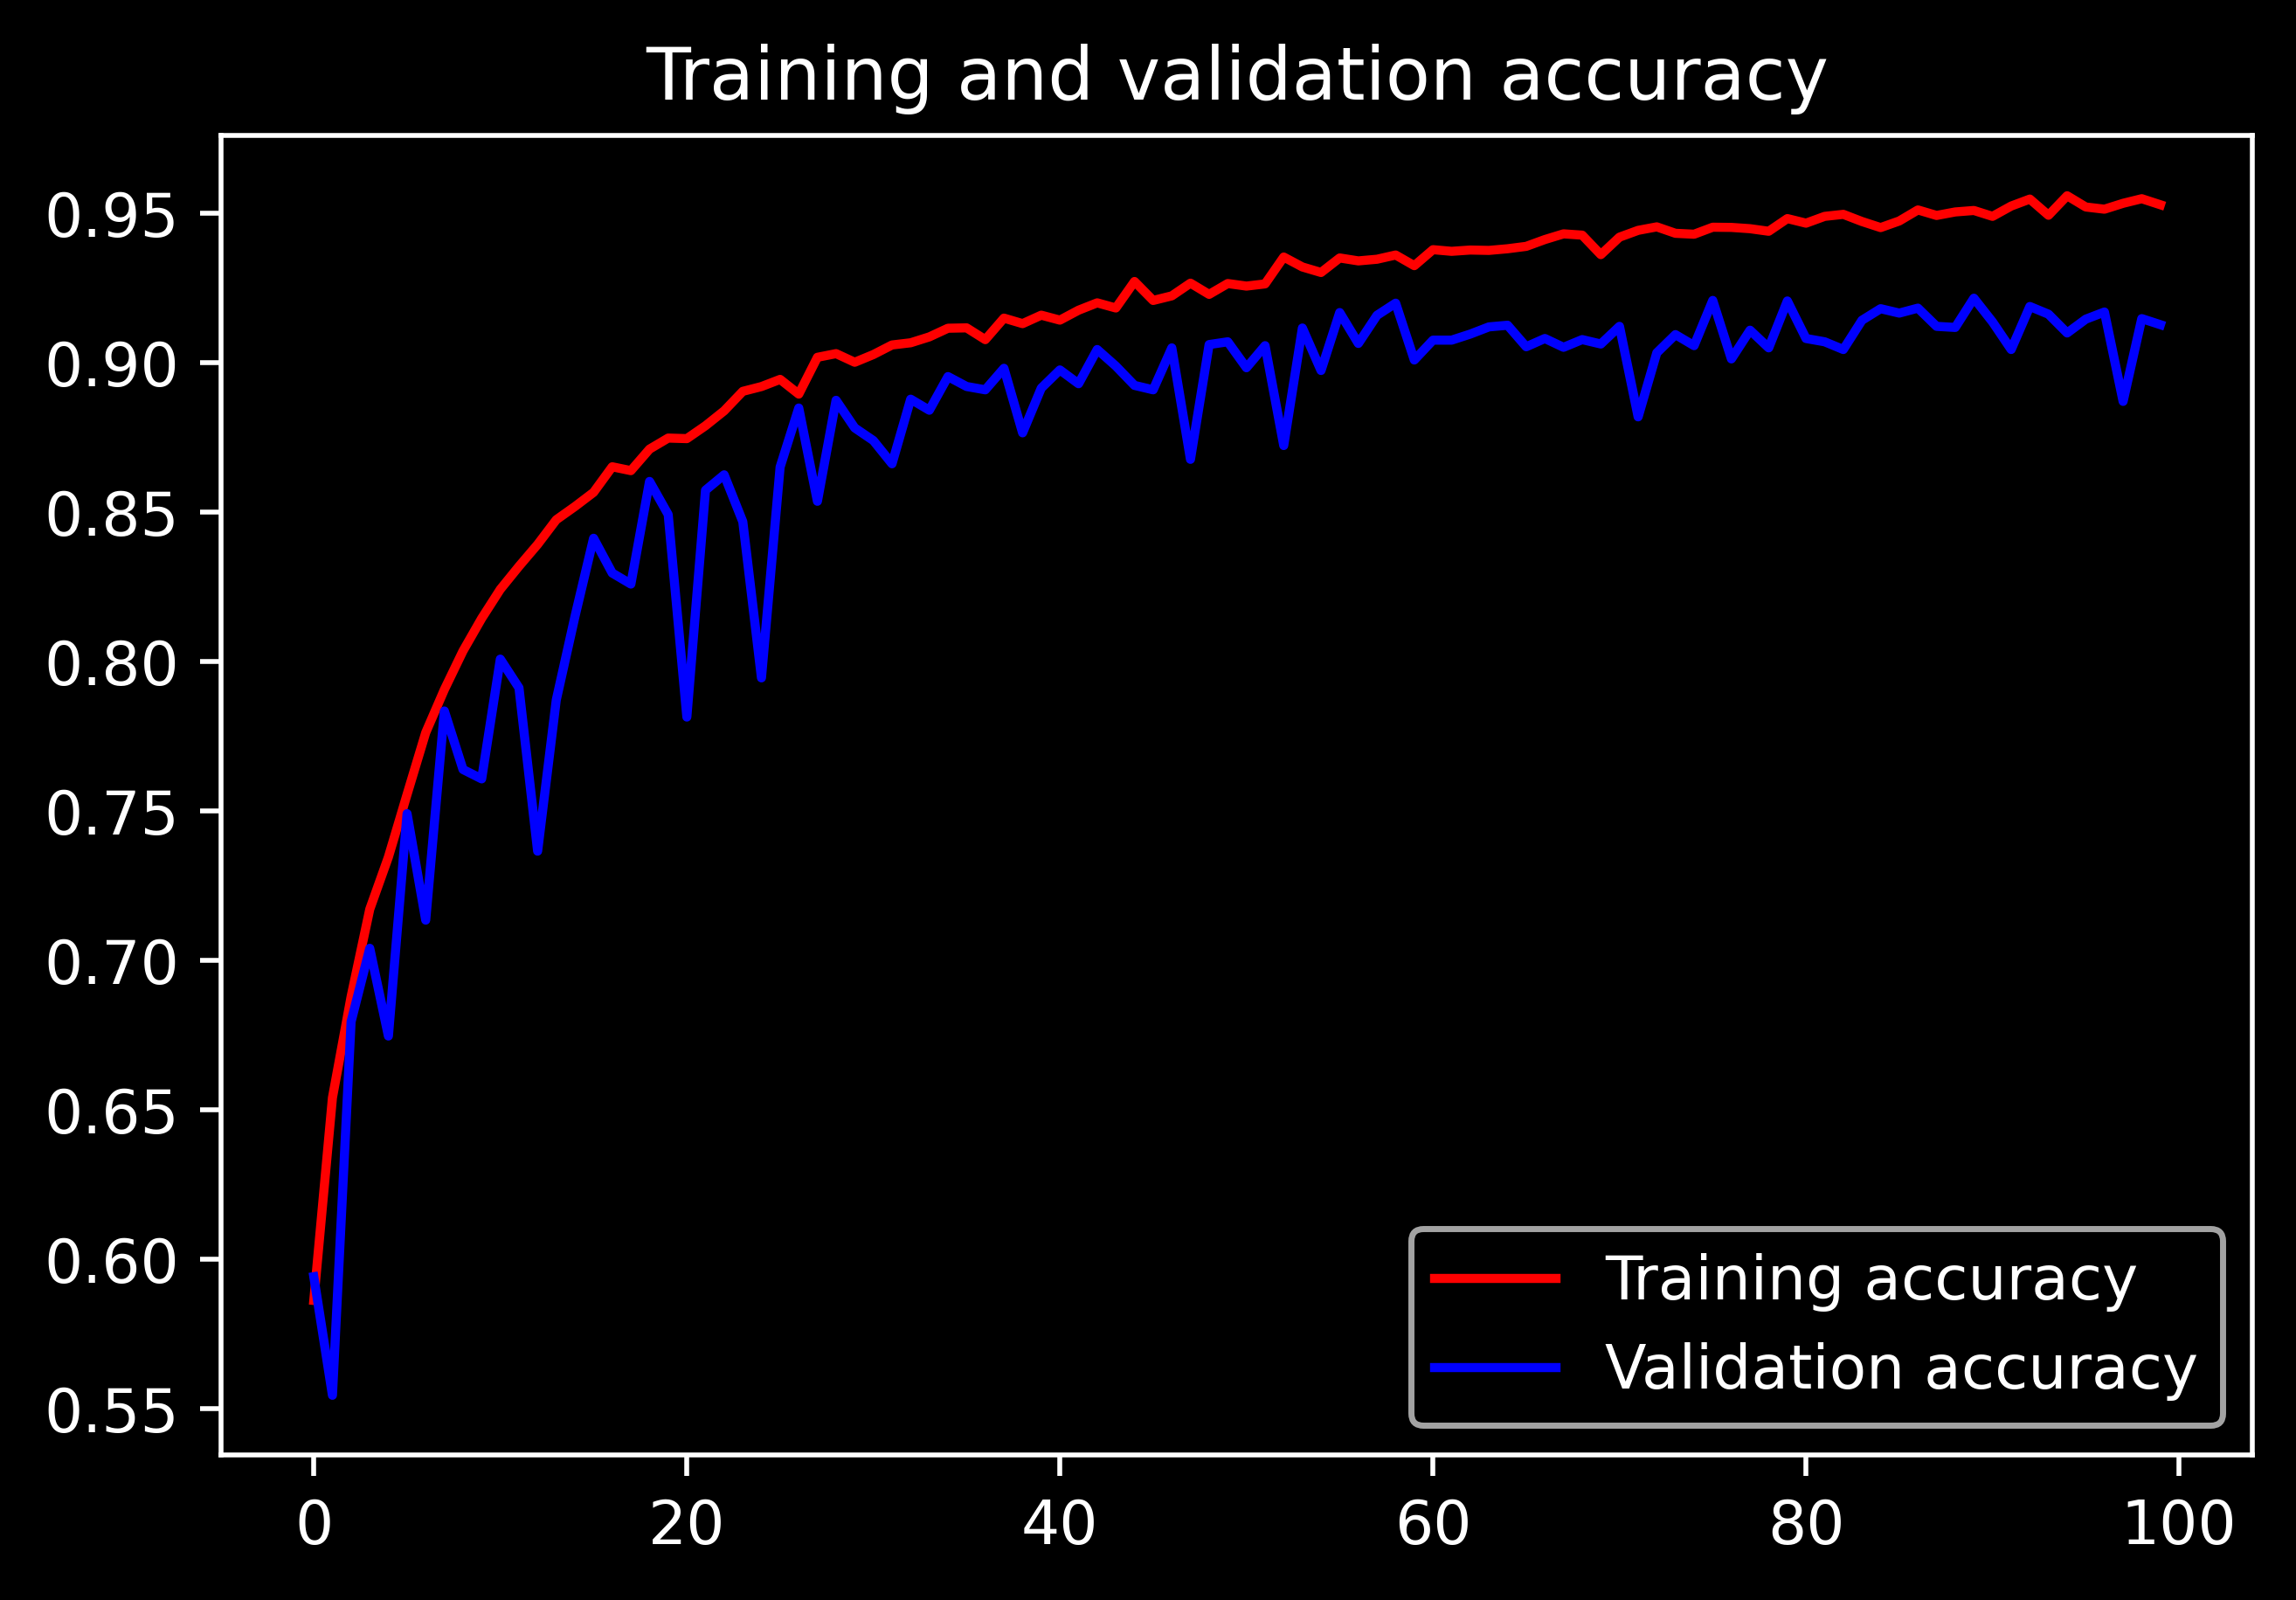

<Figure size 3000x2000 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

Con rmsprop: 
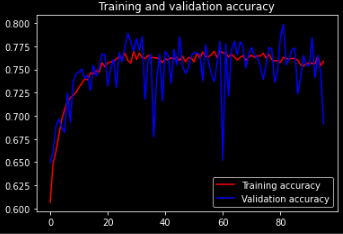

In [ ]:
%%time
modelCNN.predict(x_test_cnn[5:6])

CPU times: user 47 ms, sys: 0 ns, total: 47 ms
Wall time: 46.8 ms


array([[9.7217327e-01, 2.7382534e-02, 4.4420810e-04]], dtype=float32)

In [ ]:
plt.style.use('dark_background')

### 2.1.3 Prueba de clasificación

In [ ]:
# # #Vamos a predecir y almacenar la predicciones en ORDEN
# x= robi_df_escal_completo
# y= robi_df['3 franjas']

x_train1, x_test1 ,y_train1, y_test1 = train_test_split( imagenes, targets_uni , random_state=None, shuffle=False)
print(len(x_test1))

# x_train[1].reshape(12,12,1)

x_train=np.array(x_test1)
x_train1=x_train.reshape(5415 ,12,12,1)
# y_train_cnn=np.array(y_train)
# y_train=y_train.reshape(17325,1)
# y_test_cnn=np.array(y_test)
# y_test=y_test.reshape(4332,1)
print(x_train1.shape)

5415
(5415, 12, 12, 1)


In [ ]:
%%time
modelCNN.predict(x_train1[1:2])

CPU times: user 58.8 ms, sys: 2.92 ms, total: 61.7 ms
Wall time: 62.3 ms


array([[2.640231e-03, 9.364919e-04, 9.964233e-01]], dtype=float32)

In [ ]:
%%time
forecast = []
a=500 

for time in range(1000):
  # a=45000+time
  forecast.append(modelCNN.predict(x_train1[a+time:a+1+time]).argmax())
  # print(len(a))
# model.predict(x_train[a:a+1])

# x_train=x_train.reshape(194925,12,1)

CPU times: user 36.9 s, sys: 1.48 s, total: 38.4 s
Wall time: 38.3 s


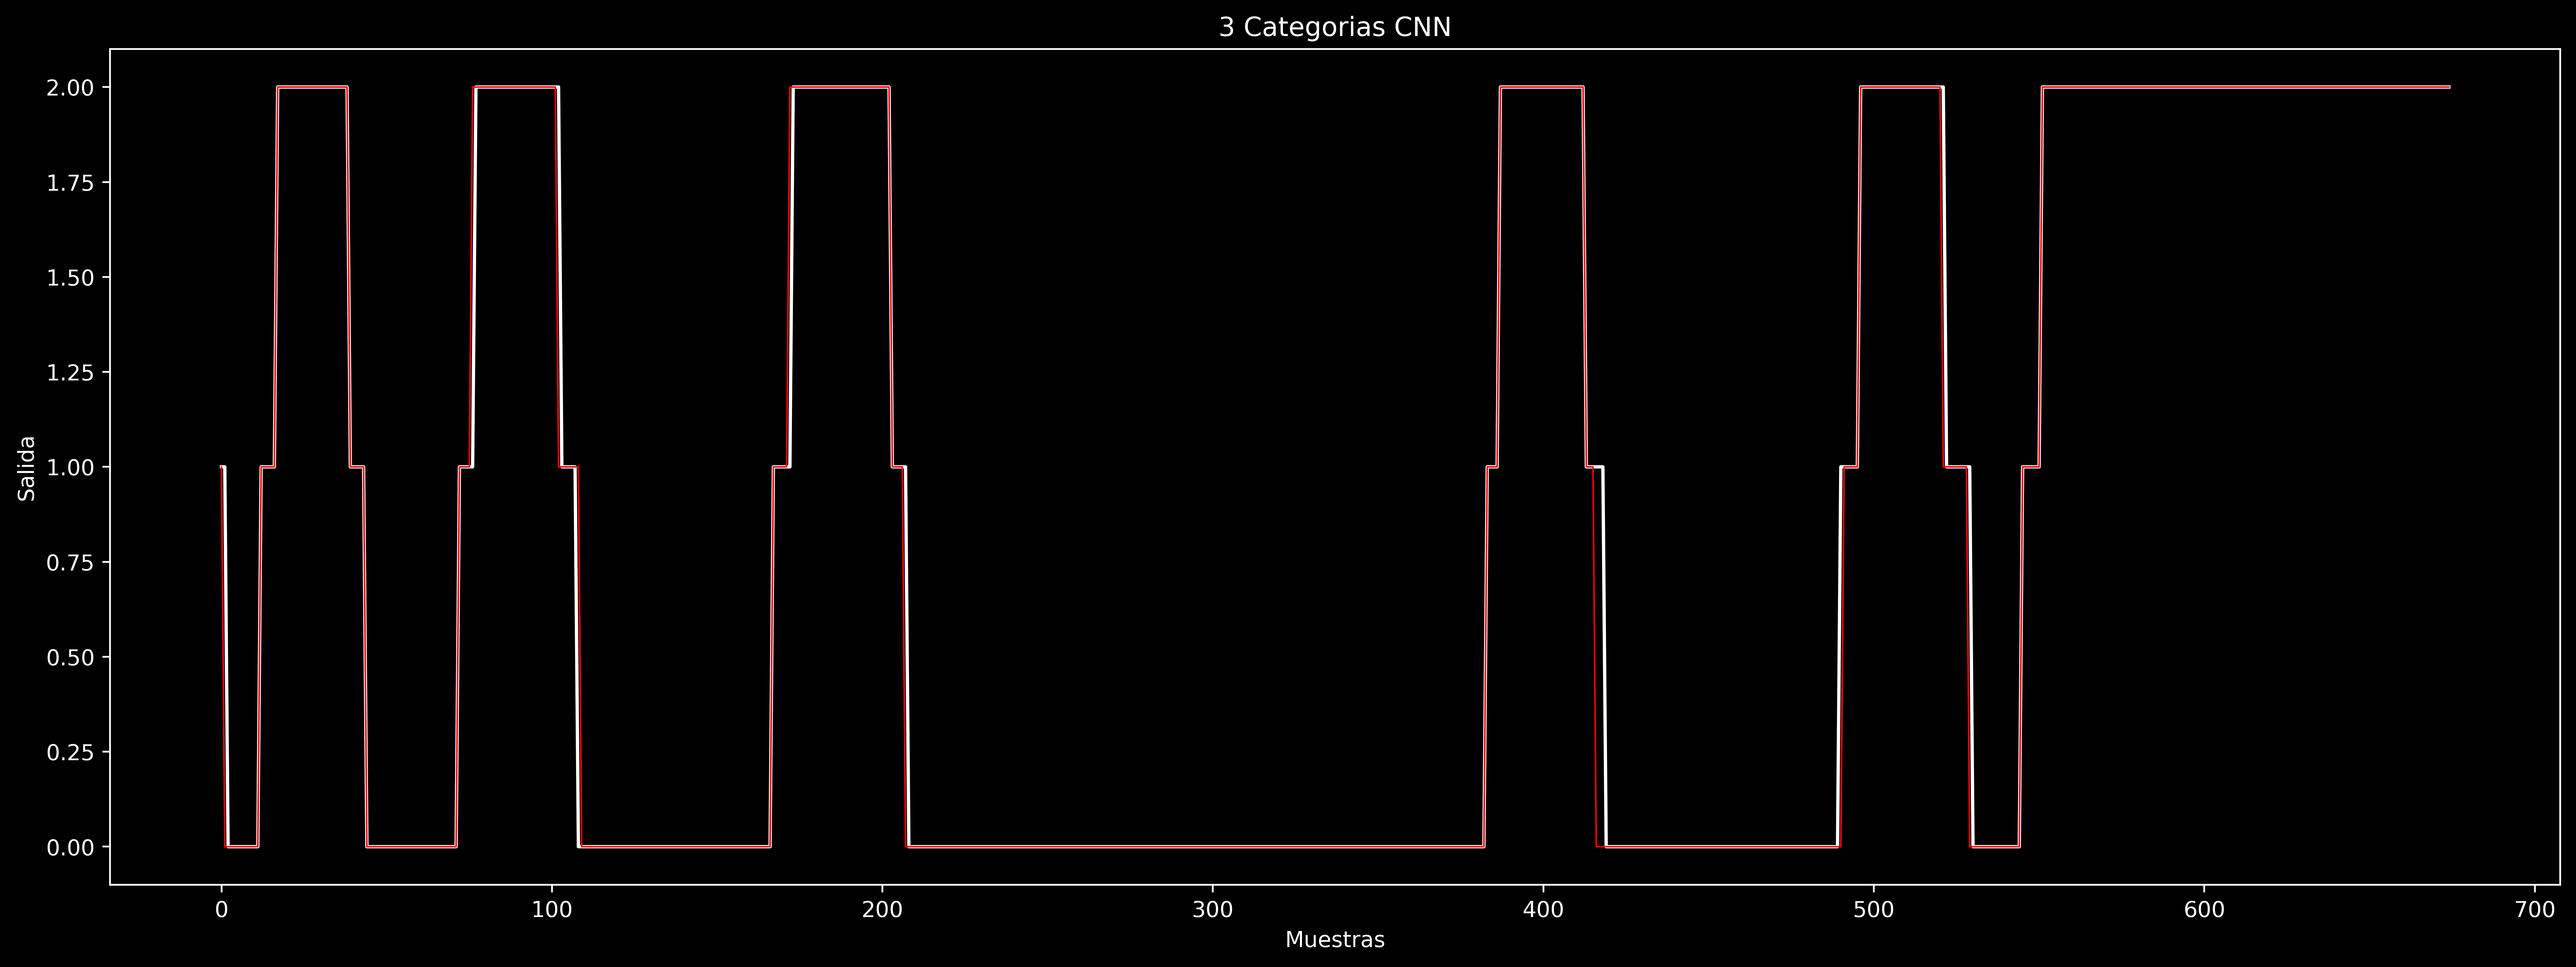

In [ ]:
plt.rcParams["figure.dpi"] = 500 #calidad de imagen

salidareal= y_test1[500:1500]

prediccion=np.array(forecast,dtype=float)
plt.figure(figsize=(20,7))
# plt.subplot(121)
plt.title('3 Categorias CNN')
plt.xlabel('Muestras')
plt.ylabel('Salida')
plt.plot(np.arange(0,675,1),salidareal[125:800],color='w', label='3 angulos Real')

# plt.subplot(122)
# plt.title('Regresión')
plt.plot(prediccion[125:800],color='r',linewidth=0.7, label= 'Clasificación')
plt.show()




In [ ]:
import time

start_time = time.process_time ()

with tf.device('/device:GPU:0'):
  modelCNN.predict(x_train1[5:6])

print(time.process_time () - start_time, "seconds con GPU")

start_time = time.process_time ()

with tf.device('/device:CPU:0'):
  modelCNN.predict(x_train1[5:6])

print(time.process_time () - start_time, "seconds con CPU")

ValueError: ignored

## 2.2 Prueba directa con DH


### 2.2.1 Carga de dataset con DH

In [ ]:
#importamos librerias numpy, pandas y matplot 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
#importamos algoritmo Random Forest
from sklearn.model_selection import train_test_split 
import joblib
from sklearn.preprocessing import MinMaxScaler
# !pip install mplcyberpunk
plt.style.use('dark_background')
# import mplcyberpunk


In [ ]:
#asociamos drive para carga de dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#Cargamos dataset y visualizamos en un dataframe
robi_df=pd.read_excel("/content/drive/MyDrive/5. Robi/Datasets Robi/DATASET_ROBI_DH_n.xlsx")
display(robi_df)

DeltMed  DeltFront    Biceps  Flex_Muñe  Flex_Dedos     Prona  \
0       0.389161   0.364190  0.421093  -0.425448    0.265269  0.539926   
1       0.416812   0.404935  0.479914  -0.376361    0.298468  0.572627   
2       0.444079   0.444934  0.537669  -0.328062    0.331164  0.605088   
3       0.470964   0.484192  0.594365  -0.280546    0.363360  0.637312   
4       0.497468   0.522715  0.650010  -0.233809    0.395059  0.669299   
...          ...        ...       ...        ...         ...       ...   
259896  0.396426   0.341419  0.480150  -0.465531    0.242766  0.503299   
259897  0.389548   0.337769  0.456864  -0.467473    0.240533  0.503977   
259898  0.382579   0.334071  0.433327  -0.469423    0.238296  0.504685   
259899  0.375519   0.330327  0.409538  -0.471383    0.236056  0.505423   
259900  0.368368   0.326535  0.385496  -0.473351    0.233813  0.506190   

        can1raw   can2raw  can3raw  can4raw  can5raw  can6raw  Angulo  \
0      -3846.00  14671.28  3980.62 -4295.11  -874.40 -1232.27      28   
1      -3442.57  13645.11  4065.02 -4412.86  -767.76 -2332.94      28   
2      -2785.47  12551.20  4354.72 -3703.44 -1183.50 -2328.45      28   
3      -2891.49  13116.50  4407.63 -3244.71 -1473.02 -1209.36      28   
4      -3501.45  14298.05  4189.23 -3597.89 -1289.14  -685.89      28   
...         ...       ...      ...      ...      ...      ...     ...   
259896  -990.94  15384.24  2776.91 -4206.64 -2033.49 -2609.28      53   
259897  -624.15  15927.56  2827.09 -2965.67 -2125.47 -2096.84      53   
259898 -1603.00  17360.24  2658.49 -3315.41 -2045.34 -2238.39      53   
259899 -2385.29  17829.45  2500.29 -4462.95 -1801.73 -2722.69      53   
259900 -1975.04  16755.89  2531.51 -5018.86 -1693.19 -2960.00      53   

        3 franjas  4 franjas           x          y          z  
0               0          0  139.812777  68.695340  21.530602  
1               0          0  126.563655  68.408805   8.947439  
2               0          0  112.851217  67.079383  -1.835925  
3               0          0   98.931432  64.778315 -10.852328  
4               0          0   85.031762  61.592556 -18.157430  
...           ...        ...         ...        ...        ...  
259896          0          0  132.865010  66.104693  17.343300  
259897          0          0  136.823011  66.631418  20.753799  
259898          0          0  140.753650  67.075609  24.315398  
259899          0          0  144.650534  67.434727  28.029428  
259900          0          0  148.507001  67.706347  31.897023  

[259901 rows x 18 columns]

In [ ]:
robi_df.info() # verificar nulls
plt.style.use('dark_background')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259901 entries, 0 to 259900
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   DeltMed     259901 non-null  float64
 1   DeltFront   259901 non-null  float64
 2   Biceps      259901 non-null  float64
 3   Flex_Muñe   259901 non-null  float64
 4   Flex_Dedos  259901 non-null  float64
 5   Prona       259901 non-null  float64
 6   can1raw     259901 non-null  float64
 7   can2raw     259901 non-null  float64
 8   can3raw     259901 non-null  float64
 9   can4raw     259901 non-null  float64
 10  can5raw     259901 non-null  float64
 11  can6raw     259901 non-null  float64
 12  Angulo      259901 non-null  int64  
 13  3 franjas   259901 non-null  int64  
 14  4 franjas   259901 non-null  int64  
 15  x           259901 non-null  float64
 16  y           259901 non-null  float64
 17  z           259901 non-null  float64
dtypes: float64(15), int64(3)
memory usage: 35.7 

In [ ]:
robi_df.groupby('3 franjas').count()

DeltMed  DeltFront  Biceps  Flex_Muñe  Flex_Dedos   Prona  can1raw  \
3 franjas                                                                       
0           111675     111675  111675     111675      111675  111675   111675   
1            60863      60863   60863      60863       60863   60863    60863   
2            87363      87363   87363      87363       87363   87363    87363   

           can2raw  can3raw  can4raw  can5raw  can6raw  Angulo  4 franjas  \
3 franjas                                                                   
0           111675   111675   111675   111675   111675  111675     111675   
1            60863    60863    60863    60863    60863   60863      60863   
2            87363    87363    87363    87363    87363   87363      87363   

                x       y       z  
3 franjas                          
0          111675  111675  111675  
1           60863   60863   60863  
2           87363   87363   87363

In [ ]:
# #Generamos un andrews plot 
# fig = plt.figure(figsize = (25, 8))
# pd.plotting.andrews_curves(robi_df,'3 franjas')
# plt.show()

In [ ]:
# #Generamos un grafico de coordenadas paralelas.
# fig = plt.figure(figsize = (25, 8))
# pd.plotting.parallel_coordinates(robi_df_escal,'target')
# plt.show()

In [ ]:
envolventes=robi_df[['DeltMed','DeltFront','Biceps','Flex_Muñe','Flex_Dedos','Prona']]
crudas=robi_df[['can1raw',	'can2raw',	'can3raw',	'can4raw',	'can5raw',	'can6raw']]
completo_dh=robi_df.drop(['Angulo',	'3 franjas',	'4 franjas'], axis=1)
display(envolventes,crudas,completo_dh)

DeltMed  DeltFront    Biceps  Flex_Muñe  Flex_Dedos     Prona
0       0.389161   0.364190  0.421093  -0.425448    0.265269  0.539926
1       0.416812   0.404935  0.479914  -0.376361    0.298468  0.572627
2       0.444079   0.444934  0.537669  -0.328062    0.331164  0.605088
3       0.470964   0.484192  0.594365  -0.280546    0.363360  0.637312
4       0.497468   0.522715  0.650010  -0.233809    0.395059  0.669299
...          ...        ...       ...        ...         ...       ...
259896  0.396426   0.341419  0.480150  -0.465531    0.242766  0.503299
259897  0.389548   0.337769  0.456864  -0.467473    0.240533  0.503977
259898  0.382579   0.334071  0.433327  -0.469423    0.238296  0.504685
259899  0.375519   0.330327  0.409538  -0.471383    0.236056  0.505423
259900  0.368368   0.326535  0.385496  -0.473351    0.233813  0.506190

[259901 rows x 6 columns]

can1raw   can2raw  can3raw  can4raw  can5raw  can6raw
0      -3846.00  14671.28  3980.62 -4295.11  -874.40 -1232.27
1      -3442.57  13645.11  4065.02 -4412.86  -767.76 -2332.94
2      -2785.47  12551.20  4354.72 -3703.44 -1183.50 -2328.45
3      -2891.49  13116.50  4407.63 -3244.71 -1473.02 -1209.36
4      -3501.45  14298.05  4189.23 -3597.89 -1289.14  -685.89
...         ...       ...      ...      ...      ...      ...
259896  -990.94  15384.24  2776.91 -4206.64 -2033.49 -2609.28
259897  -624.15  15927.56  2827.09 -2965.67 -2125.47 -2096.84
259898 -1603.00  17360.24  2658.49 -3315.41 -2045.34 -2238.39
259899 -2385.29  17829.45  2500.29 -4462.95 -1801.73 -2722.69
259900 -1975.04  16755.89  2531.51 -5018.86 -1693.19 -2960.00

[259901 rows x 6 columns]

DeltMed  DeltFront    Biceps  Flex_Muñe  Flex_Dedos     Prona  \
0       0.389161   0.364190  0.421093  -0.425448    0.265269  0.539926   
1       0.416812   0.404935  0.479914  -0.376361    0.298468  0.572627   
2       0.444079   0.444934  0.537669  -0.328062    0.331164  0.605088   
3       0.470964   0.484192  0.594365  -0.280546    0.363360  0.637312   
4       0.497468   0.522715  0.650010  -0.233809    0.395059  0.669299   
...          ...        ...       ...        ...         ...       ...   
259896  0.396426   0.341419  0.480150  -0.465531    0.242766  0.503299   
259897  0.389548   0.337769  0.456864  -0.467473    0.240533  0.503977   
259898  0.382579   0.334071  0.433327  -0.469423    0.238296  0.504685   
259899  0.375519   0.330327  0.409538  -0.471383    0.236056  0.505423   
259900  0.368368   0.326535  0.385496  -0.473351    0.233813  0.506190   

        can1raw   can2raw  can3raw  can4raw  can5raw  can6raw           x  \
0      -3846.00  14671.28  3980.62 -4295.11  -874.40 -1232.27  139.812777   
1      -3442.57  13645.11  4065.02 -4412.86  -767.76 -2332.94  126.563655   
2      -2785.47  12551.20  4354.72 -3703.44 -1183.50 -2328.45  112.851217   
3      -2891.49  13116.50  4407.63 -3244.71 -1473.02 -1209.36   98.931432   
4      -3501.45  14298.05  4189.23 -3597.89 -1289.14  -685.89   85.031762   
...         ...       ...      ...      ...      ...      ...         ...   
259896  -990.94  15384.24  2776.91 -4206.64 -2033.49 -2609.28  132.865010   
259897  -624.15  15927.56  2827.09 -2965.67 -2125.47 -2096.84  136.823011   
259898 -1603.00  17360.24  2658.49 -3315.41 -2045.34 -2238.39  140.753650   
259899 -2385.29  17829.45  2500.29 -4462.95 -1801.73 -2722.69  144.650534   
259900 -1975.04  16755.89  2531.51 -5018.86 -1693.19 -2960.00  148.507001   

                y          z  
0       68.695340  21.530602  
1       68.408805   8.947439  
2       67.079383  -1.835925  
3       64.778315 -10.852328  
4       61.592556 -18.157430  
...           ...        ...  
259896  66.104693  17.343300  
259897  66.631418  20.753799  
259898  67.075609  24.315398  
259899  67.434727  28.029428  
259900  67.706347  31.897023  

[259901 rows x 15 columns]

In [ ]:
# Aplicamos MinMaxScaler a la data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(envolventes))
robi_df_escal_env=pd.DataFrame(scaler.transform(envolventes),
                           columns=envolventes.columns)
print(scaler.fit(crudas))
robi_df_escal_crudo=pd.DataFrame(scaler.transform(crudas),
                           columns=crudas.columns)
print(scaler.fit(completo_dh))
robi_df_escal_completo_dh=pd.DataFrame(scaler.transform(completo_dh),
                           columns=completo_dh.columns)
display(robi_df_escal_env,robi_df_escal_crudo,robi_df_escal_completo_dh)

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


DeltMed  DeltFront    Biceps  Flex_Muñe  Flex_Dedos     Prona
0       0.247748   0.208665  0.178718   0.164989    0.168876  0.171864
1       0.265351   0.232010  0.203682   0.187489    0.190010  0.182273
2       0.282709   0.254928  0.228194   0.209627    0.210825  0.192606
3       0.299825   0.277422  0.252256   0.231407    0.231322  0.202863
4       0.316698   0.299493  0.275873   0.252830    0.251502  0.213044
...          ...        ...       ...        ...         ...       ...
259896  0.252372   0.195618  0.203782   0.146616    0.154550  0.160205
259897  0.247994   0.193527  0.193899   0.145726    0.153128  0.160421
259898  0.243557   0.191409  0.183910   0.144832    0.151704  0.160646
259899  0.239063   0.189263  0.173814   0.143934    0.150278  0.160881
259900  0.234510   0.187090  0.163610   0.143032    0.148850  0.161125

[259901 rows x 6 columns]

can1raw   can2raw   can3raw   can4raw   can5raw   can6raw
0       0.259546  0.562185  0.635017  0.333882  0.749379  0.496714
1       0.296044  0.559331  0.642612  0.322341  0.782175  0.493779
2       0.355491  0.556289  0.668678  0.391876  0.654318  0.493791
3       0.345900  0.557861  0.673439  0.436839  0.565279  0.496775
4       0.290717  0.561147  0.653788  0.402221  0.621829  0.498171
...          ...       ...       ...       ...       ...       ...
259896  0.517842  0.564167  0.526709  0.342554  0.392911  0.493042
259897  0.551025  0.565678  0.531224  0.464190  0.364624  0.494408
259898  0.462469  0.569662  0.516054  0.429909  0.389267  0.494031
259899  0.391696  0.570967  0.501819  0.317431  0.464187  0.492740
259900  0.428811  0.567981  0.504628  0.262943  0.497567  0.492107

[259901 rows x 6 columns]

DeltMed  DeltFront    Biceps  Flex_Muñe  Flex_Dedos     Prona  \
0       0.247748   0.208665  0.178718   0.164989    0.168876  0.171864   
1       0.265351   0.232010  0.203682   0.187489    0.190010  0.182273   
2       0.282709   0.254928  0.228194   0.209627    0.210825  0.192606   
3       0.299825   0.277422  0.252256   0.231407    0.231322  0.202863   
4       0.316698   0.299493  0.275873   0.252830    0.251502  0.213044   
...          ...        ...       ...        ...         ...       ...   
259896  0.252372   0.195618  0.203782   0.146616    0.154550  0.160205   
259897  0.247994   0.193527  0.193899   0.145726    0.153128  0.160421   
259898  0.243557   0.191409  0.183910   0.144832    0.151704  0.160646   
259899  0.239063   0.189263  0.173814   0.143934    0.150278  0.160881   
259900  0.234510   0.187090  0.163610   0.143032    0.148850  0.161125   

         can1raw   can2raw   can3raw   can4raw   can5raw   can6raw         x  \
0       0.259546  0.562185  0.635017  0.333882  0.749379  0.496714  0.785554   
1       0.296044  0.559331  0.642612  0.322341  0.782175  0.493779  0.740941   
2       0.355491  0.556289  0.668678  0.391876  0.654318  0.493791  0.694766   
3       0.345900  0.557861  0.673439  0.436839  0.565279  0.496775  0.647894   
4       0.290717  0.561147  0.653788  0.402221  0.621829  0.498171  0.601090   
...          ...       ...       ...       ...       ...       ...       ...   
259896  0.517842  0.564167  0.526709  0.342554  0.392911  0.493042  0.762159   
259897  0.551025  0.565678  0.531224  0.464190  0.364624  0.494408  0.775487   
259898  0.462469  0.569662  0.516054  0.429909  0.389267  0.494031  0.788723   
259899  0.391696  0.570967  0.501819  0.317431  0.464187  0.492740  0.801845   
259900  0.428811  0.567981  0.504628  0.262943  0.497567  0.492107  0.814831   

               y         z  
0       0.638790  0.447530  
1       0.637506  0.404122  
2       0.631549  0.366923  
3       0.621239  0.335820  
4       0.606964  0.310620  
...          ...       ...  
259896  0.627182  0.433085  
259897  0.629542  0.444850  
259898  0.631532  0.457136  
259899  0.633141  0.469948  
259900  0.634358  0.483290  

[259901 rows x 15 columns]

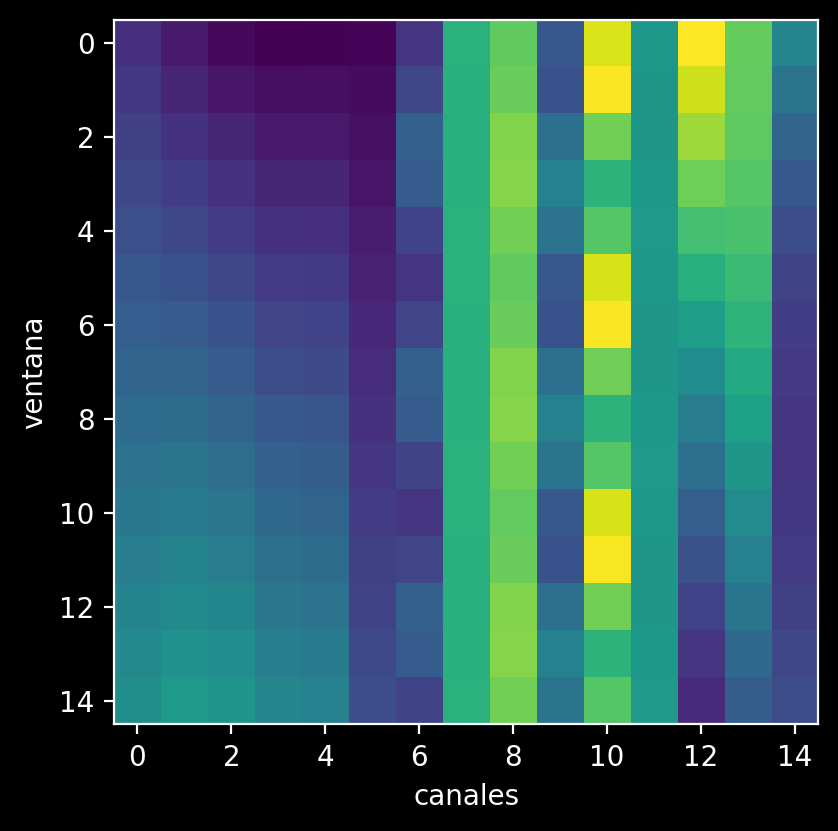

In [ ]:
data=robi_df_escal_completo_dh
target=robi_df['3 franjas']

# visualizar como imagen:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.xlabel('canales')
plt.ylabel('ventana')
plt.imshow(data[0:15])

In [ ]:
n = 15 # ventana!!! 
# Split data
df_data=data
imagenes = [df_data[i:i+n] for i in range(0,df_data.shape[0],n)]

# Split targets
df_target=target
targets = [df_target[i:i+n] for i in range(0,df_target.shape[0],n)]


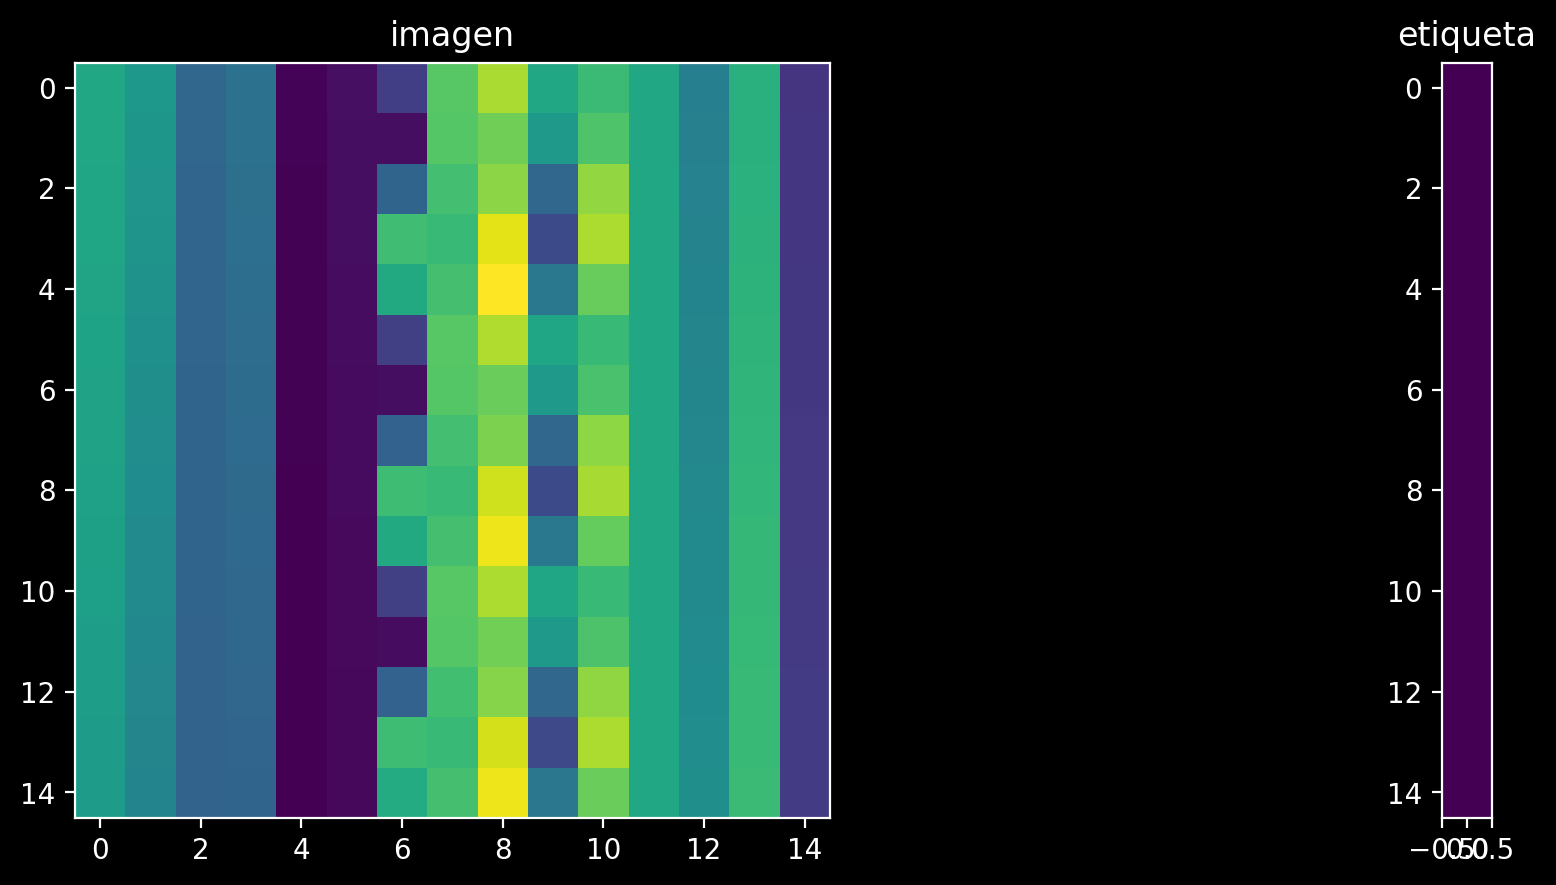

31350    0
31351    0
31352    0
31353    0
31354    0
31355    0
31356    0
31357    0
31358    0
31359    0
31360    0
31361    0
31362    0
31363    0
31364    0
Name: 3 franjas, dtype: int64

In [ ]:
# Extraemos moda de la columna target para generar etiqueta ordenada
# Si existen 2 modas, elegir la numericamente mas pequeña.
id=2090
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('imagen')
plt.imshow(imagenes[id])
plt.subplot(122)
plt.title('etiqueta')
plt.imshow(np.array(targets[id]/.2).reshape(len(targets[id]),1))
plt.show()

display(targets[id])

In [ ]:
# min(targets[id].mode())
# prueba=pd.DataFrame([0,0,0,0,0,1,1,1,1,1])
# min(np.array(prueba.mode()))

targets_uni=[]
for f in targets:
  targets_uni.append(min(np.array(f.mode())))
  

In [ ]:
print(len(imagenes),len(targets_uni))

17327 17327


In [ ]:
# prueba_estadistica=pd.DataFrame(targets_uni)
imagenes=imagenes[:17326 ]
targets_uni=targets_uni[:17326 ]
print(len(imagenes),len(targets_uni))

17326 17326


In [ ]:
# x_train=imagenes[:int(len(imagenes)*0.8)]
# x_test=imagenes[int(len(imagenes)*0.8):]
# y_train=targets_uni[:int(len(targets_uni)*0.8)]
# y_test=targets_uni[int(len(targets_uni)*0.8):]
x_train, x_test ,y_train, y_test = train_test_split( imagenes , targets_uni , random_state=0)

print(len(x_train),len(x_test))
print(len(y_train),len(y_test))


12994 4332
12994 4332


In [ ]:
# x_train[1].reshape(12,12,1)

x_train=np.array(x_train)
x_train_cnn=x_train.reshape(12994,15,15,1)
x_test=np.array(x_test)
x_test_cnn=x_test.reshape(4332,15,15,1)
y_train_cnn=np.array(y_train)
# y_train=y_train.reshape(17325,1)
y_test_cnn=np.array(y_test)
# y_test=y_test.reshape(4332,1)
print(x_train_cnn.shape,x_test_cnn.shape,y_train_cnn.shape)



(12994, 15, 15, 1) (4332, 15, 15, 1) (12994,)


### 2.2.2 Generamos el modelo y entrenamos la red con la base de datos realizada 

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
# model = tf.keras.models.Sequential([
#     # Note the input shape is the desired size of the image 150x150 with 3 bytes color
#     # This is the first convolution
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(15, 15, 1),padding='same'),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     # # The second convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # Flatten the results to feed into a DNN
#     tf.keras.layers.Flatten(),
#     # tf.keras.layers.Dropout(0.5),
#     # 512 neuron hidden layer
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dropout(0.1),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dense(3, activation='softmax')
# ])

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(15, 15, 1),padding='same'),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    # # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    # BatchNormalization(),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 15, 15, 32)        320       
                                                                 
 batch_normalization_21 (Bat  (None, 15, 15, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 batch_normalization_22 (Bat  (None, 7, 7, 64)         256       
 chNormalization)                                                
                                                     

In [ ]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

In [ ]:
# model.summary()

import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") # para tensorboard
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1) # para tensorboard 

model.compile(loss = 'SparseCategoricalCrossentropy', optimizer='Adam', metrics=['accuracy'])

history=model.fit(x_train_cnn,y_train_cnn, epochs=175, callbacks=[tensorboard_callback],validation_data=(x_test_cnn,y_test_cnn))

# model.save("/content/drive/Shareddrives/ML-IALAB/peru/risk-classificaction/riesguito2.h5")
# rmsprop no sirvio, horrible, overifitt y muchisimo ruido en el validation ! 

Epoch 1/175
407/407 [==============================] - 20s 43ms/step - loss: 0.9218 - accuracy: 0.5713 - val_loss: 1.0480 - val_accuracy: 0.4813
Epoch 2/175
407/407 [==============================] - 11s 27ms/step - loss: 0.8079 - accuracy: 0.6401 - val_loss: 0.7634 - val_accuracy: 0.6579
Epoch 3/175
407/407 [==============================] - 12s 28ms/step - loss: 0.7396 - accuracy: 0.6795 - val_loss: 0.7195 - val_accuracy: 0.6932
Epoch 4/175
407/407 [==============================] - 11s 28ms/step - loss: 0.6951 - accuracy: 0.6997 - val_loss: 0.6317 - val_accuracy: 0.7235
Epoch 5/175
407/407 [==============================] - 11s 28ms/step - loss: 0.6534 - accuracy: 0.7205 - val_loss: 0.5945 - val_accuracy: 0.7454
Epoch 6/175
407/407 [==============================] - 11s 27ms/step - loss: 0.6071 - accuracy: 0.7458 - val_loss: 0.5853 - val_accuracy: 0.7505
Epoch 7/175
407/407 [==============================] - 11s 28ms/step - loss: 0.5725 - accuracy: 0.7641 - val_loss: 0.6042 - val_ac

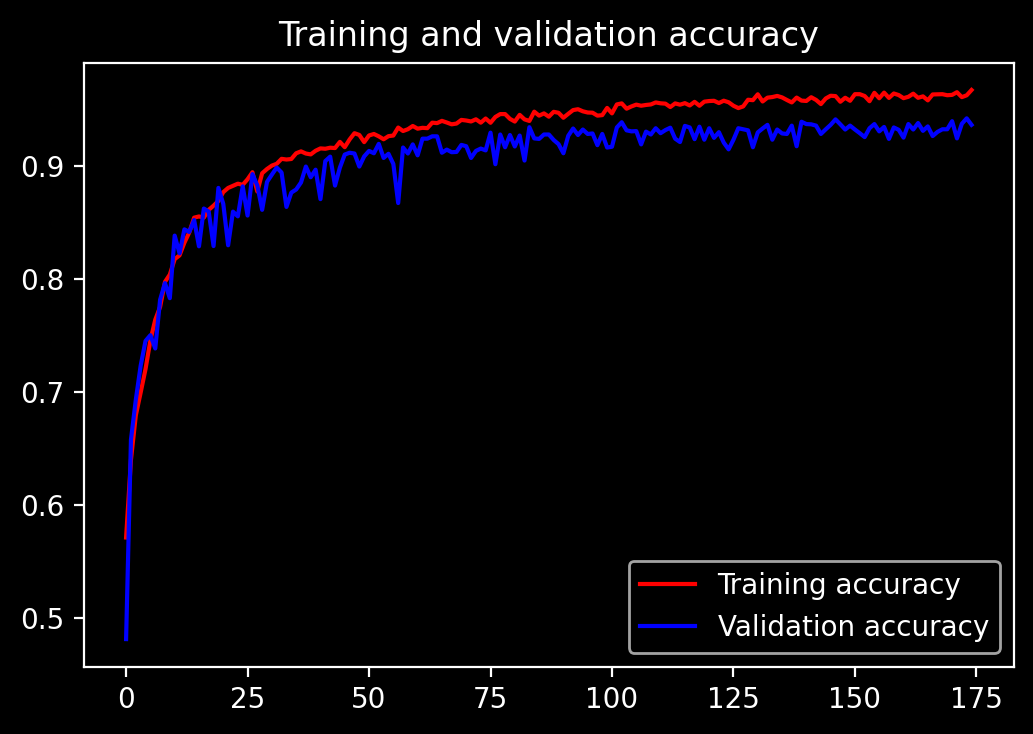

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure()

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)

plt.show()

Con rmsprop: 
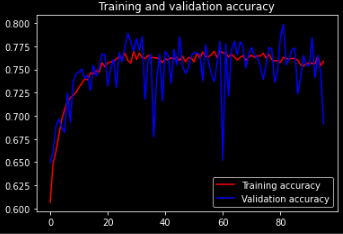

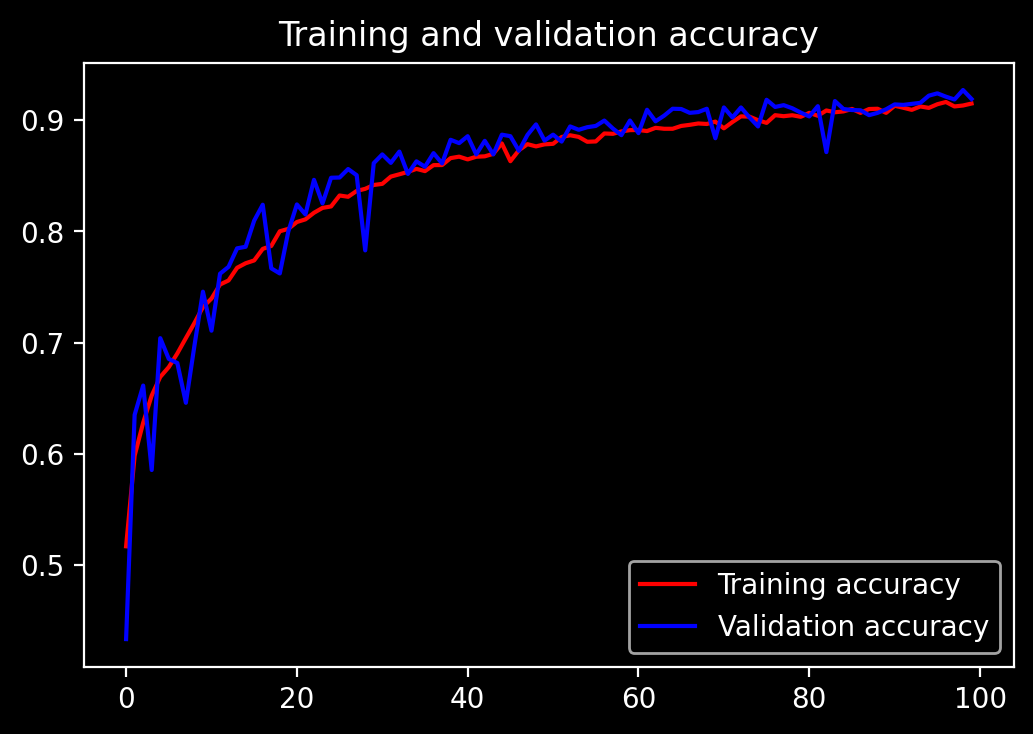

In [ ]:
%%time
model.predict(x_test_cnn[5:6])

CPU times: user 130 ms, sys: 1.72 ms, total: 132 ms
Wall time: 131 ms


array([[1., 0., 0.]], dtype=float32)

In [ ]:
model.save("/content/drive/MyDrive/5. Robi/Algoritmos Robi/peso_CNN_DH.h5")

### 2.2.3 Prueba DH 

In [ ]:
# # #Vamos a predecir y almacenar la predicciones en ORDEN
# x= robi_df_escal_completo
# y= robi_df['3 franjas']

x_train1, x_test1 ,y_train1, y_test1 = train_test_split( imagenes, targets_uni , random_state=None, shuffle=False)
print(len(x_test1))

# x_train[1].reshape(12,12,1)

x_train=np.array(x_test1)
x_train1=x_train.reshape(4332 ,15,15,1)
# y_train_cnn=np.array(y_train)
# y_train=y_train.reshape(17325,1)
# y_test_cnn=np.array(y_test)
# y_test=y_test.reshape(4332,1)
print(x_train1.shape)

4332
(4332, 15, 15, 1)


In [ ]:
%%time
model.predict(x_train1[1:2])

CPU times: user 76.8 ms, sys: 3.8 ms, total: 80.6 ms
Wall time: 104 ms


array([[6.2434574e-10, 4.6225033e-09, 1.0000000e+00]], dtype=float32)

In [ ]:
%%time
forecast = []
a=500 

for time in range(500):
  # a=45000+time
  forecast.append(model.predict(x_train1[a+time:a+1+time]).argmax())
  # print(len(a))
# model.predict(x_train[a:a+1])

# x_train=x_train.reshape(194925,12,1)

CPU times: user 28.1 s, sys: 479 ms, total: 28.6 s
Wall time: 29.1 s


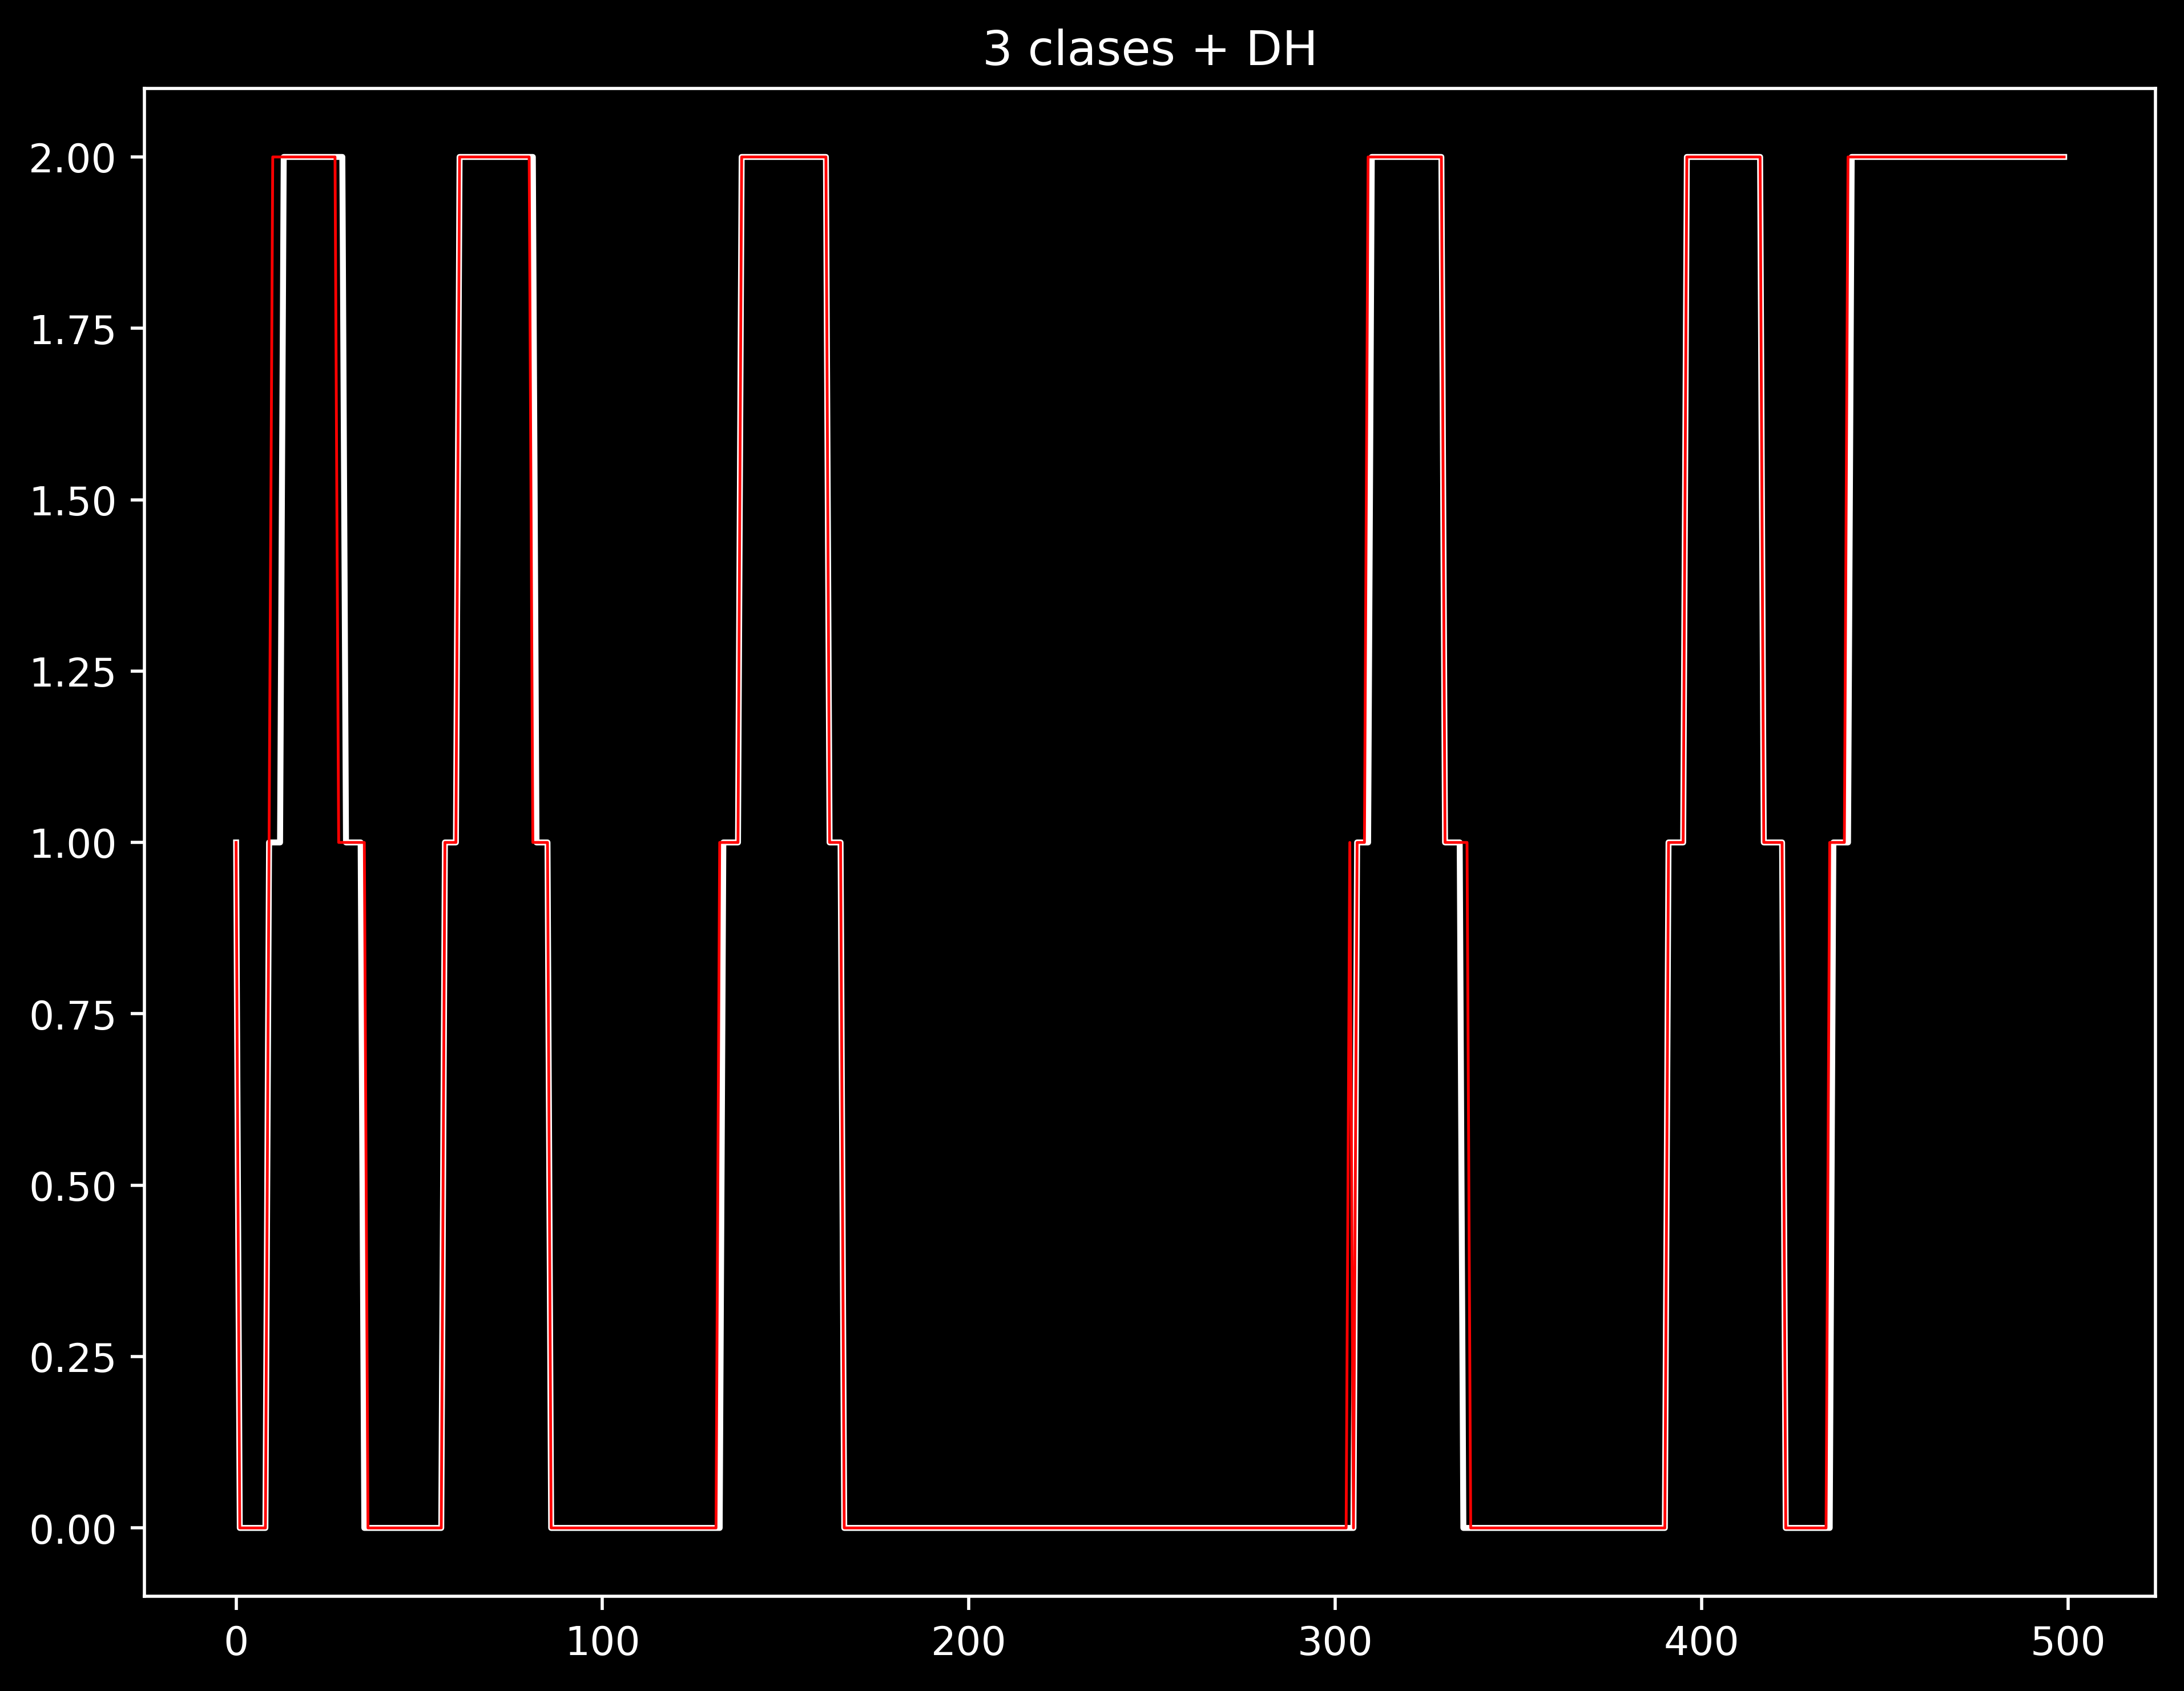

In [ ]:
plt.rcParams["figure.dpi"] = 500 #calidad de imagen

salidareal= y_test1[500:1000]

prediccion=np.array(forecast,dtype=float)
plt.figure(figsize=(20,7))
plt.subplot(121)
plt.title('3 clases + DH')
plt.plot(np.arange(0,500,1),salidareal,color='w')


# plt.subplot(122)
# plt.title('Regresión')
plt.plot(prediccion,color='r',linewidth=0.7)
plt.show()

## 2.3 Prueba renderizando imagen de señales ventaneadas desde pyplot con mapa de colores

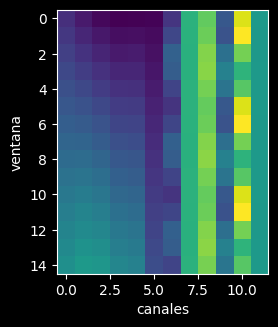

In [ ]:
data=robi_df_escal_completo
target=robi_df['3 franjas']
plt.rcParams["figure.dpi"] = 100

# visualizar como imagen:
# plt.figure(figsize=(10,10))
plt.subplot(121)
plt.xlabel('canales')
plt.ylabel('ventana')
plt.imshow(data[0:15])

In [ ]:
n = 15 # ventana!!! 
# Split data
df_data=data
imagenes = [df_data[i:i+n] for i in range(0,df_data.shape[0],n)]

# Split targets
df_target=target
targets = [df_target[i:i+n] for i in range(0,df_target.shape[0],n)]

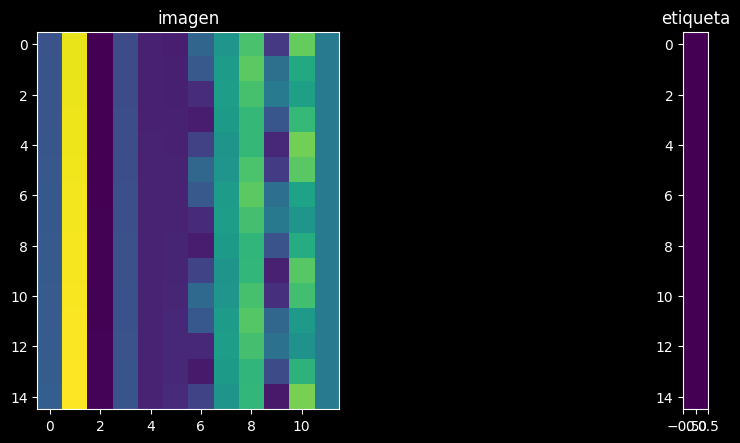

30255    1
30256    1
30257    1
30258    1
30259    1
30260    1
30261    1
30262    1
30263    1
30264    1
30265    1
30266    1
30267    1
30268    1
30269    1
Name: 3 franjas, dtype: int64

In [ ]:
# Extraemos moda de la columna target para generar etiqueta ordenada
# Si existen 2 modas, elegir la numericamente mas pequeña.
id=2017
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('imagen')
plt.imshow(imagenes[id])
plt.subplot(122)
plt.title('etiqueta')
plt.imshow(np.array(targets[id]/.2).reshape(len(targets[id]),1))
plt.show()

display(targets[id])

In [ ]:
# fig1=plt.figure()
# ax = plt.axes()
imagenes_render=[]
for f in imagenes:
  fig1, ax1 = plt.subplots(1,1,figsize=(1,1))
  plt.imshow(f)

  #Image from plot
  ax1.axis('off')
  fig1.tight_layout(pad=0)

  # # To remove the huge white borders
  ax1.margins(0)
  fig1.canvas.draw()
  image_from_plot = np.frombuffer(fig1.canvas.tostring_rgb(), dtype=np.uint8)
  image_from_plot = image_from_plot.reshape(fig1.canvas.get_width_height()[::-1] + (3,))
  imagenes_render.append(image_from_plot)
  plt.clf()
  plt.close()
  if (len(imagenes_render))%1000==0:
    print(len(imagenes_render))

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000


In [ ]:
np.save("/content/drive/MyDrive/5. Robi/Datasets Robi/Robi_imagenes_ultimo_dh.csv",imagenes_render)
# imagenes_render=np.load('/content/drive/MyDrive/5. Robi/Datasets Robi/Robi_imagenes_ultimo_dh.csv.npy')

In [ ]:
targets_uni=[]
for f in targets:
  targets_uni.append(min(np.array(f.mode())))

In [ ]:
imagenes_render[1000].shape

(100, 100, 3)

0


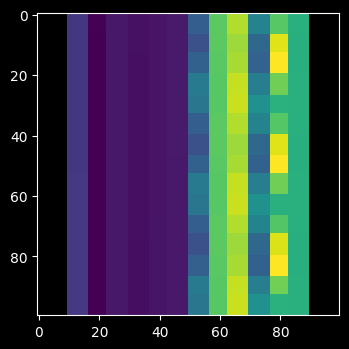

In [ ]:
plt.imshow(imagenes_render[1000])
print(targets_uni[1000])

In [ ]:
# prueba_estadistica=pd.DataFrame(targets_uni)
imagenes_render=imagenes_render[:17326]
targets_uni=targets_uni[:17326]

In [ ]:
# x_train=imagenes_render[:int(len(imagenes_render)*0.7)]
# x_test=imagenes_render[int(len(imagenes_render)*0.7):]
# y_train=targets_uni[:int(len(targets_uni)*0.7)]
# y_test=targets_uni[int(len(targets_uni)*0.7):]
x_train, x_test ,y_train, y_test = train_test_split( imagenes_render , targets_uni , random_state=0)

print(len(x_train),len(x_test))
print(len(y_train),len(y_test))


12994 4332
12994 4332


In [ ]:
# x_train[1].reshape(12,12,1)

x_train=np.array(x_train)
x_train_cnn=x_train.reshape(12994  ,100,100,3)
x_test=np.array(x_test)
x_test_cnn=x_test.reshape(4332,100,100,3)
y_train_cnn=np.array(y_train)
# y_train=y_train.reshape(17325,1)
y_test_cnn=np.array(y_test)
# y_test=y_test.reshape(4332,1)
y_train_cnn = tf.keras.utils.to_categorical(y_train_cnn, 3)
y_test_cnn = tf.keras.utils.to_categorical(y_test_cnn, 3)


print(x_train_cnn.shape,x_test_cnn.shape,y_train_cnn.shape)



(12994, 100, 100, 3) (4332, 100, 100, 3) (12994, 3)


### 2.1.1 Generamos el modelo y entrenamos la red con la base de datos realizada 

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    # tf.keras.layers.Dense(256, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 49, 49, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 10, 10, 128)     

In [ ]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

In [ ]:
# model.summary()

import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") # para tensorboard
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1) # para tensorboard 

model.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history=model.fit(x_train_cnn,y_train_cnn, epochs=100, steps_per_epoch=800, callbacks=[tensorboard_callback],validation_data=(x_test_cnn,y_test_cnn), validation_steps=10)

# model.save("/content/drive/Shareddrives/ML-IALAB/peru/risk-classificaction/riesguito2.h5")

Epoch 1/100
800/800 [==============================] - 11s 13ms/step - loss: 1.2888 - accuracy: 0.4894 - val_loss: 0.9497 - val_accuracy: 0.5277
Epoch 2/100
800/800 [==============================] - 9s 11ms/step - loss: 0.9372 - accuracy: 0.5430 - val_loss: 0.8917 - val_accuracy: 0.5965
Epoch 3/100
800/800 [==============================] - 9s 11ms/step - loss: 0.9067 - accuracy: 0.5651 - val_loss: 0.8899 - val_accuracy: 0.5845
Epoch 4/100
800/800 [==============================] - 9s 11ms/step - loss: 0.8757 - accuracy: 0.5819 - val_loss: 0.8407 - val_accuracy: 0.6129
Epoch 5/100
800/800 [==============================] - 10s 12ms/step - loss: 0.8455 - accuracy: 0.6053 - val_loss: 0.8053 - val_accuracy: 0.6427
Epoch 6/100
800/800 [==============================] - 9s 12ms/step - loss: 0.8122 - accuracy: 0.6290 - val_loss: 0.7886 - val_accuracy: 0.6554
Epoch 7/100
800/800 [==============================] - 9s 12ms/step - loss: 0.7768 - accuracy: 0.6442 - val_loss: 0.7324 - val_accurac

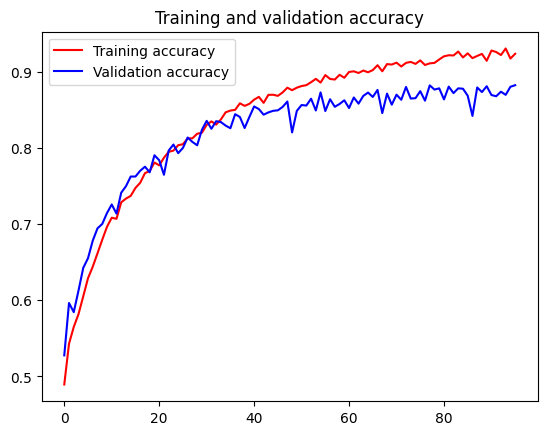

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

## 2.4 Prueba con espectrograma

In [ ]:
import numpy as np
from scipy import signal
from scipy.fft import fftshift
from matplotlib import mlab


In [ ]:
plt.style.use('default')

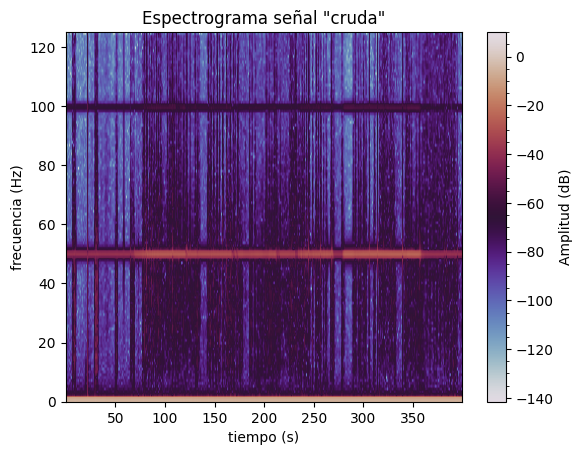

In [ ]:
plt.style.use('default')
x=np.array(robi_df_escal_completo['can3raw'][0:100000])
fs=250
def specgram2d(y, srate=250, ax=None, title=None):
  if not ax:
    ax = plt.axes()
    ax.set_title(title, loc='center', wrap=True)
    spec, freqs, t, im = ax.specgram(y,NFFT=256, Fs=fs, scale='dB', vmax=10, noverlap=1,cmap='twilight')
    ax.set_xlabel('tiempo (s)')
    ax.set_ylabel('frecuencia (Hz)')
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Amplitud (dB)')
    cbar.minorticks_on()
    # fig1.patch.set_visible(False)
    # ax.axis('off')
    return spec, freqs, t, im

fig1, ax1 = plt.subplots(2,2)
a,b,c,d=specgram2d(x, srate=fs,title='Espectrograma señal "cruda"')

# plt.plot(a)
# plt.show()

In [ ]:
#Image from plot
# ax1.axis('off')
fig1.tight_layout(pad=0)

# To remove the huge white borders
ax1.margins(0)

fig1.canvas.draw()
image_from_plot = np.frombuffer(fig1.canvas.tostring_rgb(), dtype=np.uint8)
image_from_plot = image_from_plot.reshape(fig1.canvas.get_width_height()[::-1] + (3,))

AttributeError: ignored

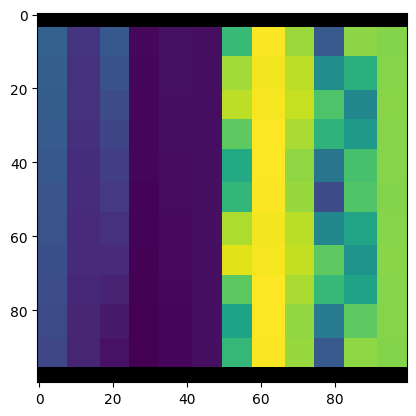

In [ ]:
plt.imshow(image_from_plot)

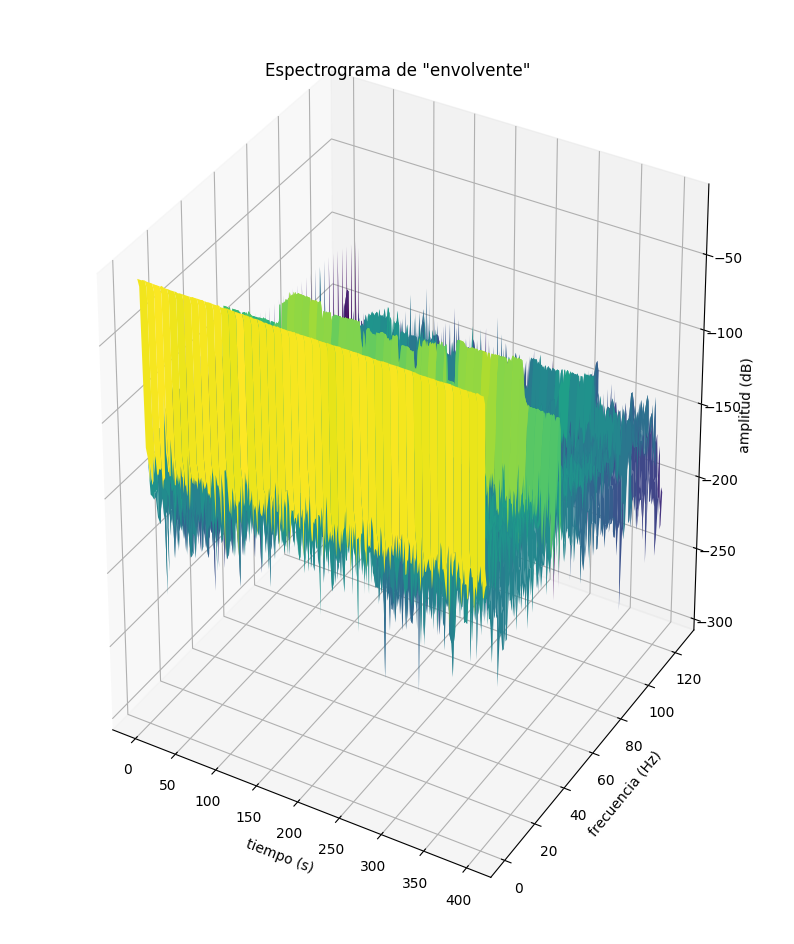

In [ ]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = [10, 12]

def specgram3d(y, srate=250, ax=None, title=None):
 if not ax:
  ax = plt.axes(projection='3d')
  ax.set_title(title, loc='center', wrap=True)
  spec, freqs, t = mlab.specgram(y, Fs=srate,NFFT=256, noverlap=10)
  X, Y, Z = t[None, :], freqs[:, None],  20.0 * np.log10(spec)
  ax.plot_surface(X, Y, Z, cmap='viridis')
  ax.set_xlabel('tiempo (s)')
  ax.set_ylabel('frecuencia (Hz)')
  ax.set_zlabel('amplitud (dB)')
  # ax.set_xlim(0, 1000)
  # ax.set_ylim(0, 20)
  # ax.set_zlim(-140, 0)
  return X, Y, Z
fig2, ax2 = plt.subplots(subplot_kw={'projection': '3d'})
a=specgram3d(x, srate=fs,title='Espectrograma de "envolvente"')
plt.show()

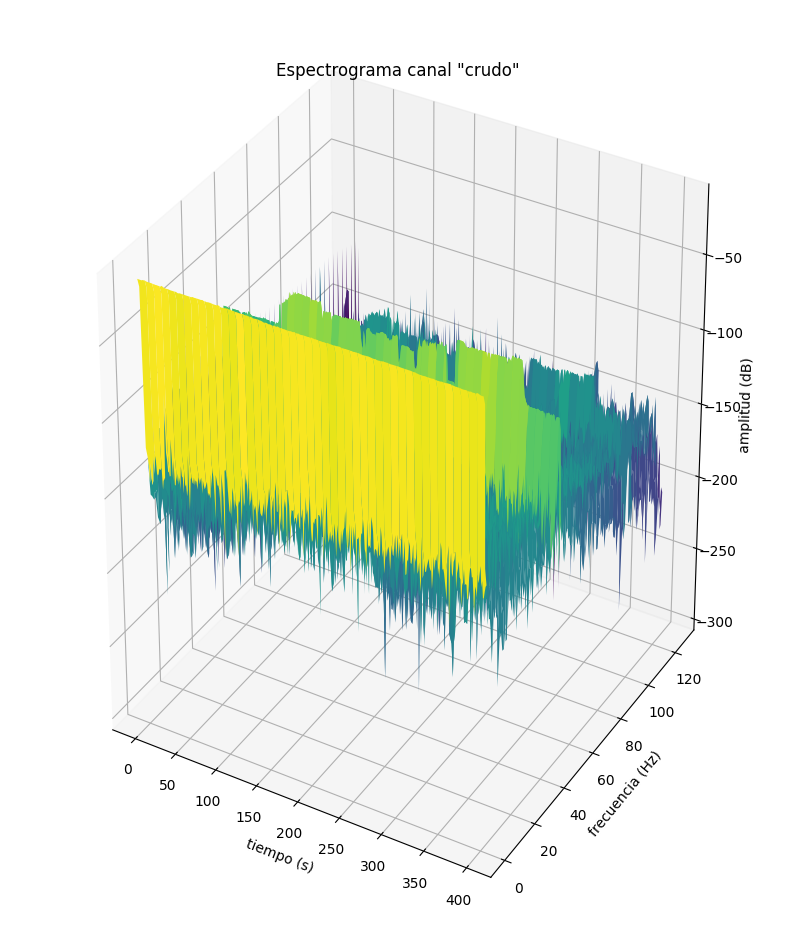

In [ ]:
plt.rcParams['figure.figsize'] = [10, 12]
señal=np.array(robi_df_escal_completo['can3raw'][0:100000])

def specgram3d(y, srate=44100, ax=None, title=None):
  if not ax:
    ax = plt.axes(projection='3d')
  ax.set_title(title, loc='center', wrap=True)
  spec, freqs, t = mlab.specgram(y, Fs=srate,NFFT=256, noverlap=10)
  X, Y, Z = t[None, :], freqs[:, None],  20.0 * np.log10(spec)
  ax.plot_surface(X, Y, Z, cmap='viridis')
  ax.set_xlabel('tiempo (s)')
  ax.set_ylabel('frecuencia (Hz)')
  ax.set_zlabel('amplitud (dB)')
  # ax.set_zlim(-140, 0)
  return X, Y, Z
fig2, ax2 = plt.subplots(subplot_kw={'projection': '3d'})
specgram3d(señal, srate=fs, ax=ax2,title='Espectrograma canal "crudo"')

plt.show()